# <center>WIFI 신호로 현재위치 및 빌딩 추측</center>

### 분석자: 박지훈
### 분석일시: 2017.08.10
### 사용자료: UJIIndoorLoc Data Set
### 자료출처: UCL Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/ujiindoorloc)
### 분석방법: OLS(Ordinary Least Square), QDA(Quadratic Discriminant Analysis)
---

### 패키지 불러오기

In [1]:
# import packages
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

### 데이터 불러오기

In [2]:
# data read
raw_train = pd.read_csv("trainingData.csv")
raw_validation = pd.read_csv("validationData.csv")

In [3]:
raw_train.head()

WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     -97     100   
3     100     100     100     100     100     100     100     100     100   
4     100     100     100     100     100     100     100     100     100   

   WAP010     ...      WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  \
0     100     ...         100 -7541.2643  4.864921e+06      2           1   
1     100     ...         100 -7536.6212  4.864934e+06      2           1   
2     100     ...         100 -7519.1524  4.864950e+06      2           1   
3     100     ...         100 -7524.5704  4.864934e+06      2           1   
4     100     ...         100 -7632.1436  4.864982e+06      0           0   

   SPACEID  RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
0      106                 2       2       23  1371713733  
1      106                 2       2       23  1371713691  
2      103                 2       2       23  1371714095  
3      102                 2       2       23  1371713807  
4      122                 2      11       13  1369909710  

[5 rows x 529 columns]

In [4]:
raw_validation.head()

WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     100     100   
3     100     100     100     100     100     100     100     100     100   
4     100     100     100     100     100     100     100     100     100   

   WAP010     ...      WAP520    LONGITUDE      LATITUDE  FLOOR  BUILDINGID  \
0     100     ...         100 -7515.916799  4.864890e+06      1           1   
1     100     ...         100 -7383.867221  4.864840e+06      4           2   
2     100     ...         100 -7374.302080  4.864847e+06      4           2   
3     100     ...         100 -7365.824883  4.864843e+06      4           2   
4     100     ...         100 -7641.499303  4.864922e+06      2           0   

   SPACEID  RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
0        0                 0       0        0  1380872703  
1        0                 0       0       13  1381155054  
2        0                 0       0       13  1381155095  
3        0                 0       0       13  1381155138  
4        0                 0       0        2  1380877774  

[5 rows x 529 columns]

---

### EDA(탐색적 시각화)
정규화된 값을 바탕으로 데이터의 분포양상 관찰

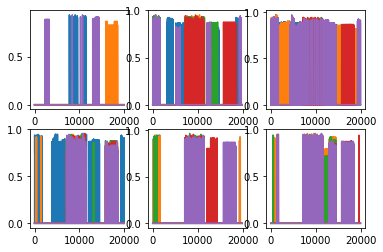

In [9]:
plt.subplot(2, 3, 1)
plt.plot(nor_train.iloc[:, :5])
plt.subplot(2, 3, 2)
plt.plot(nor_train.iloc[:, 5:10])
plt.subplot(2, 3, 3)
plt.plot(nor_train.iloc[:, 10:15])
plt.subplot(2, 3, 4)
plt.plot(nor_train.iloc[:, 15:20])
plt.subplot(2, 3, 5)
plt.plot(nor_train.iloc[:, 20:25])
plt.subplot(2, 3, 6)
plt.plot(nor_train.iloc[:, 25:30])
plt.show()

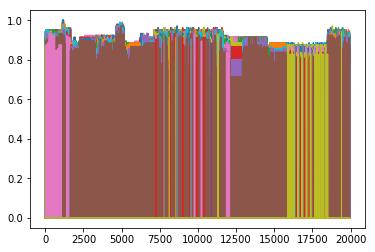

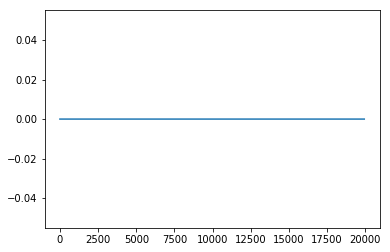

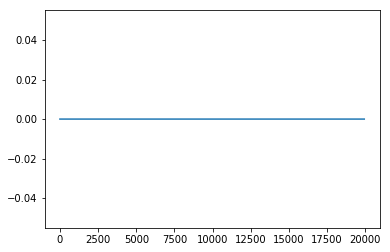

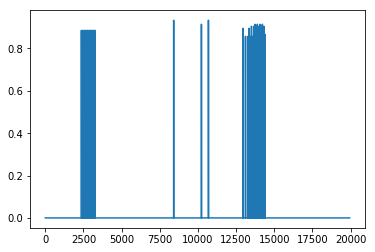

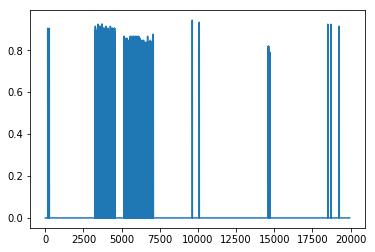

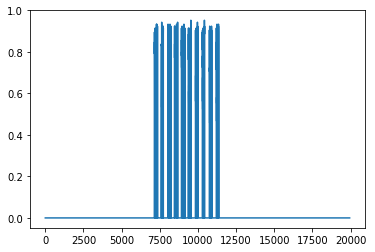

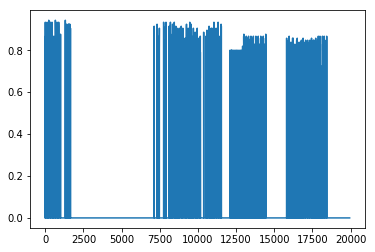

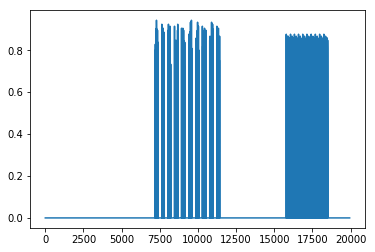

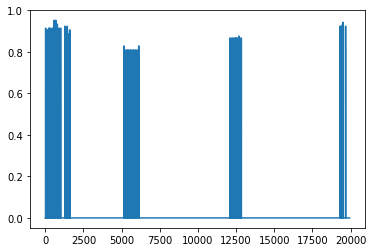

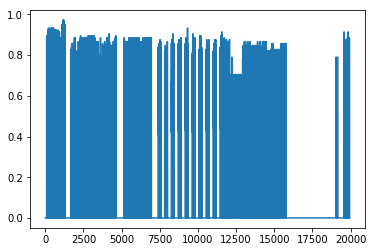

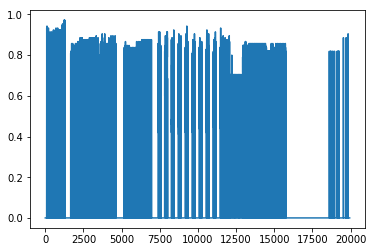

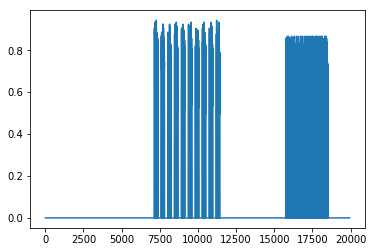

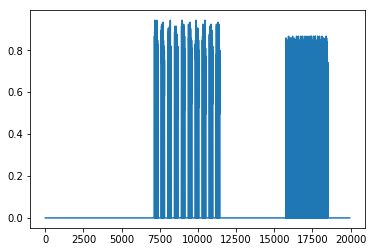

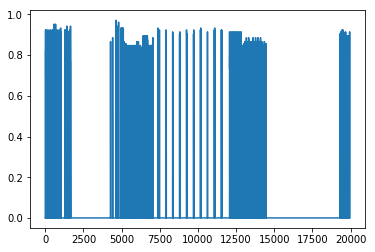

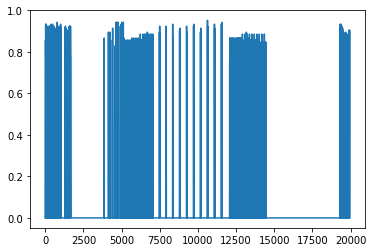

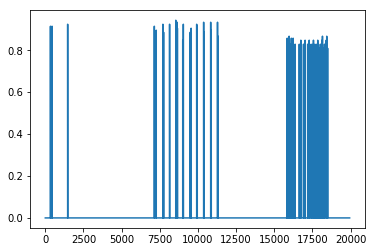

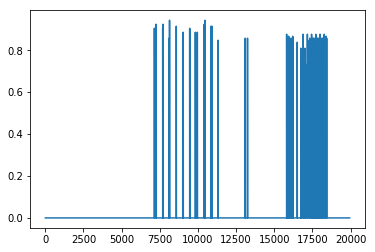

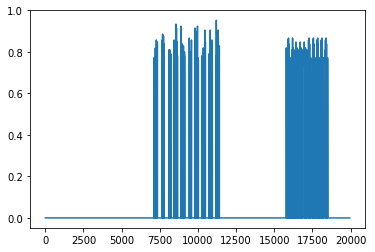

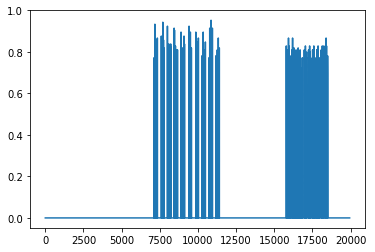

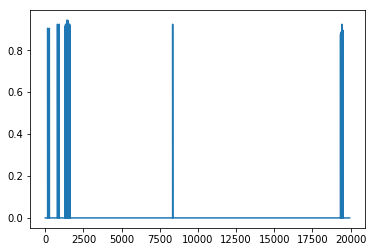

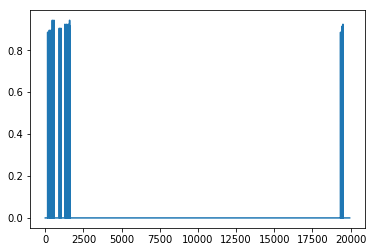

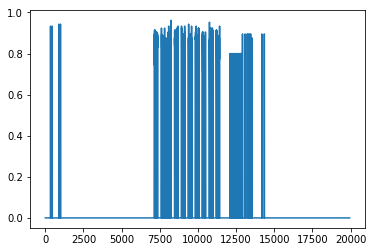

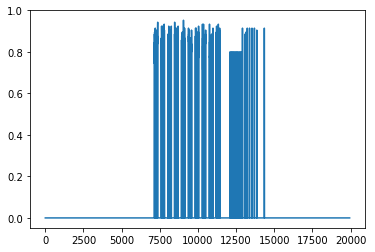

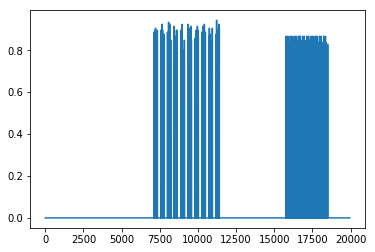

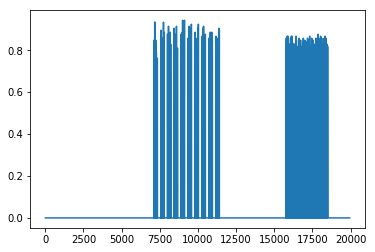

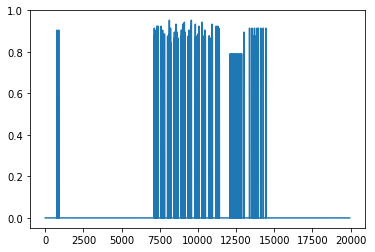

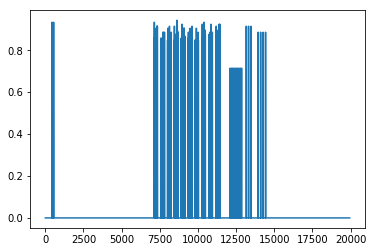

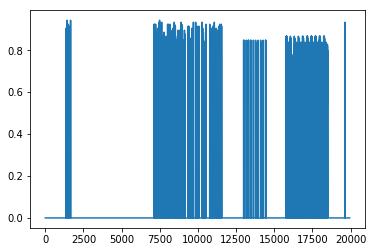

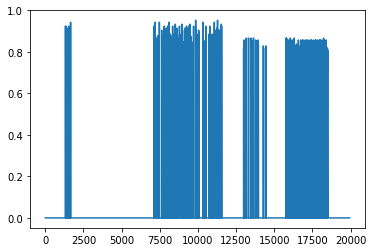

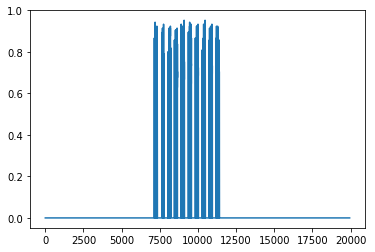

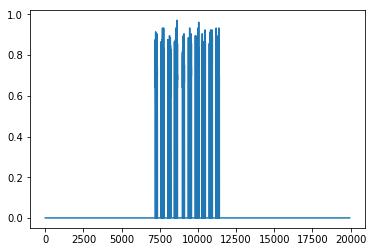

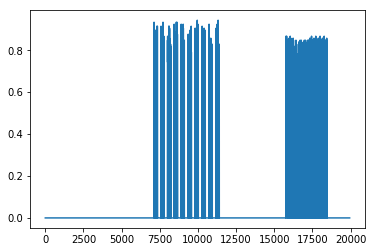

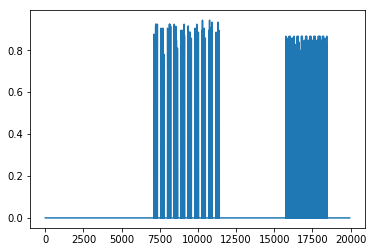

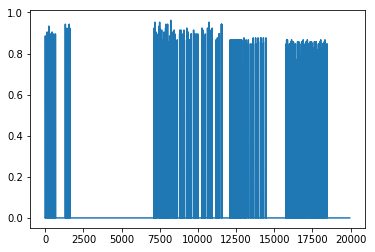

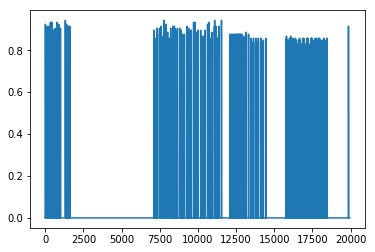

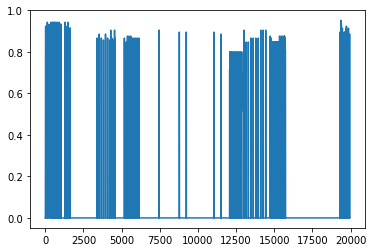

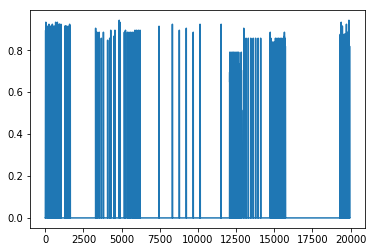

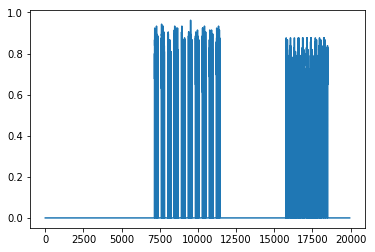

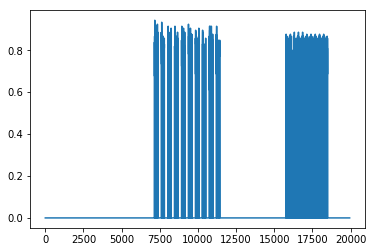

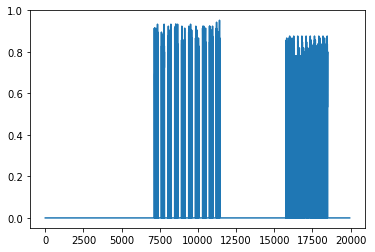

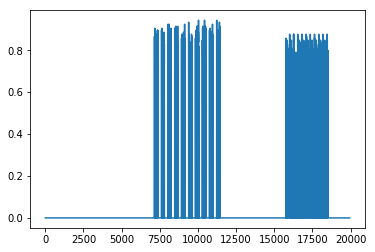

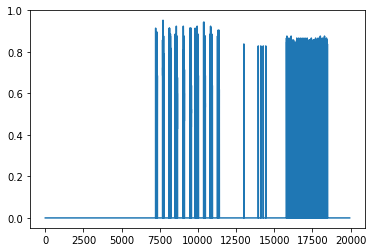

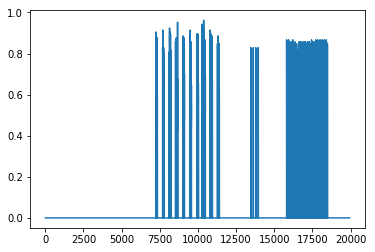

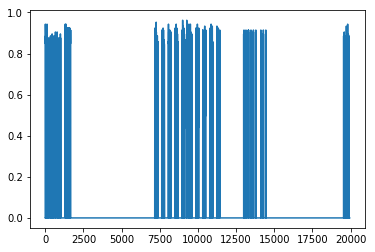

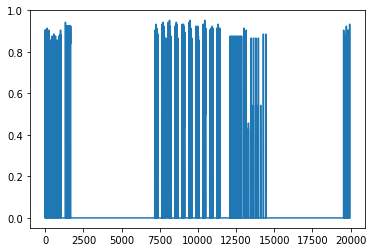

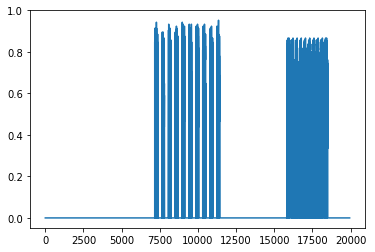

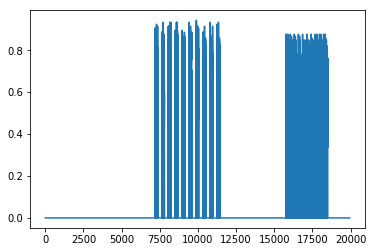

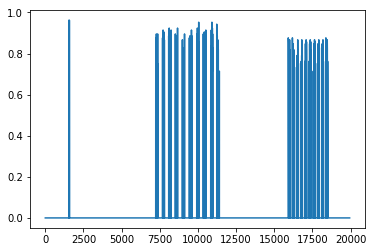

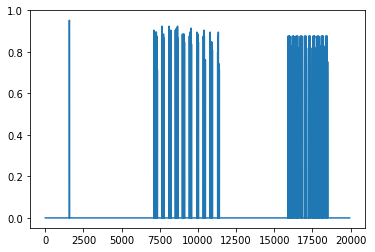

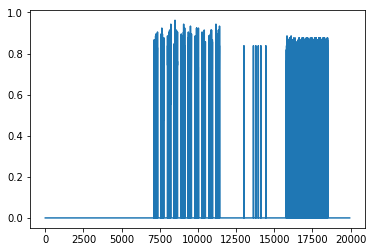

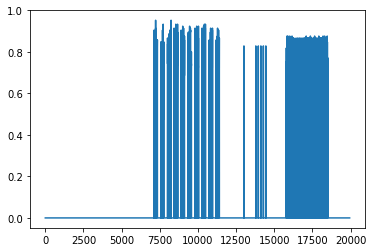

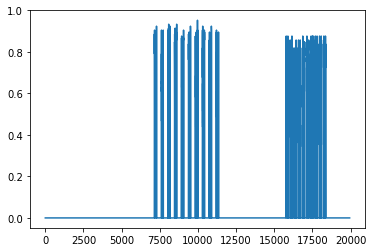

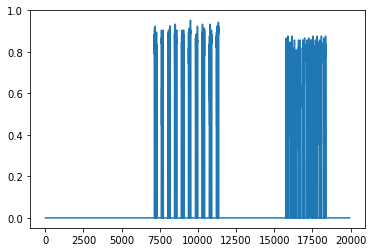

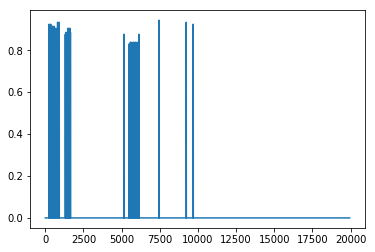

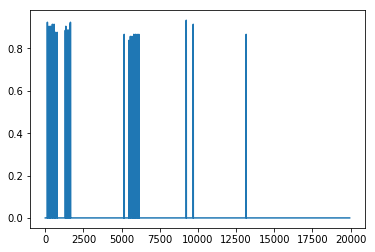

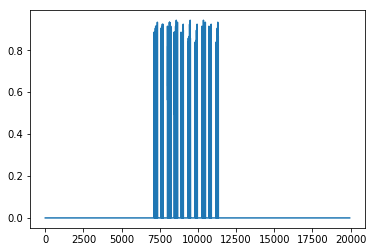

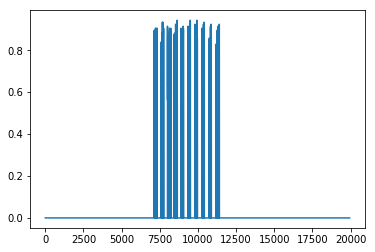

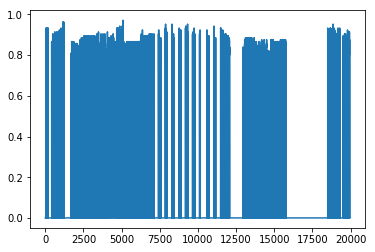

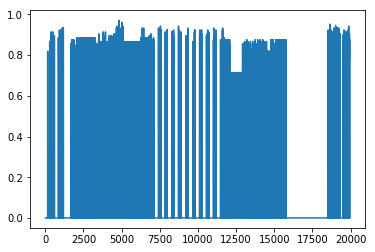

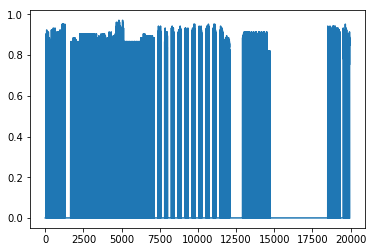

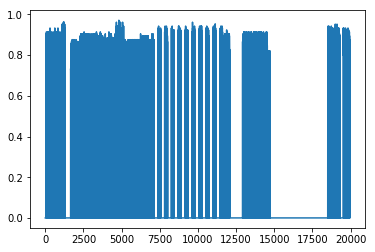

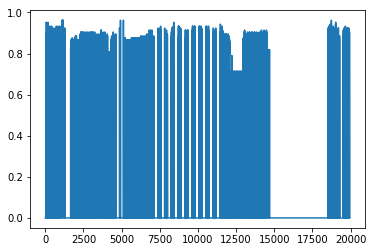

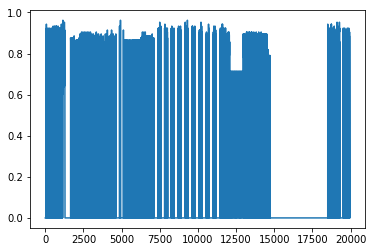

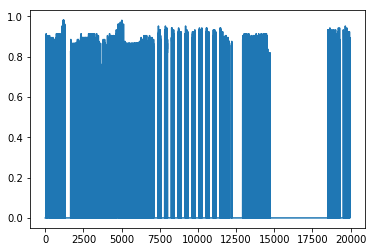

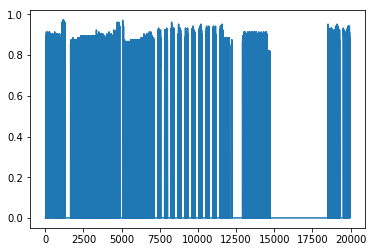

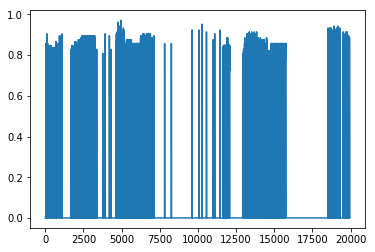

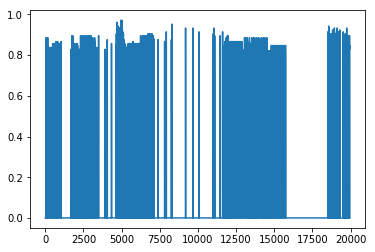

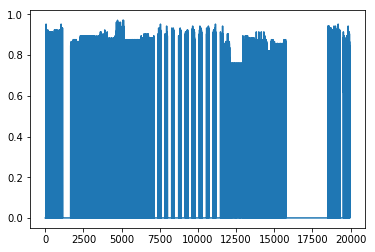

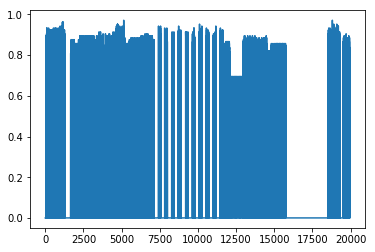

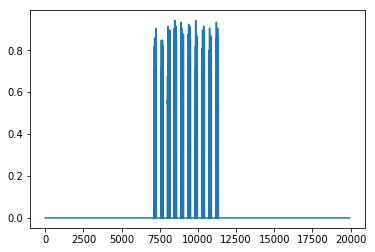

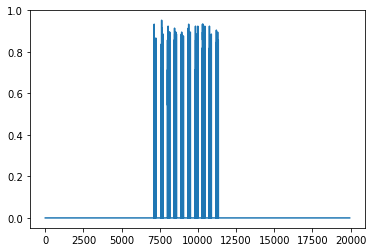

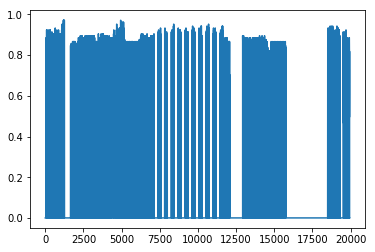

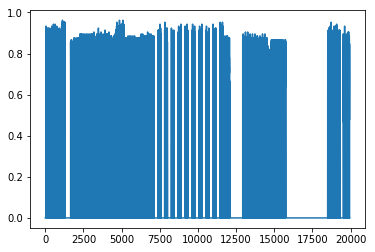

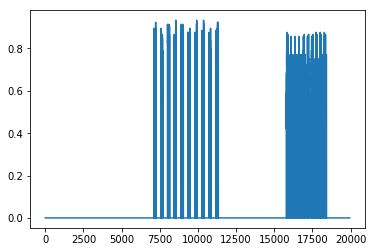

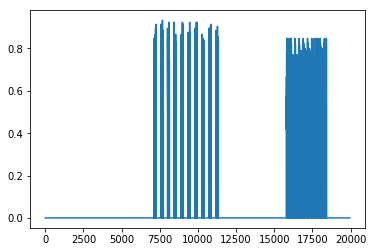

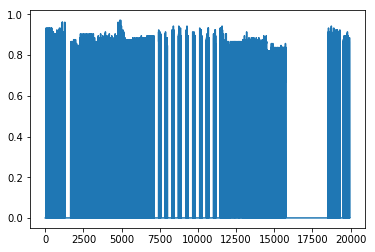

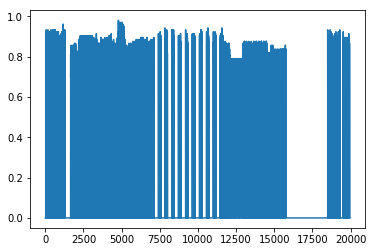

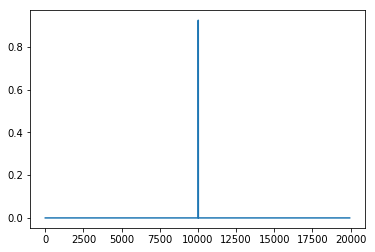

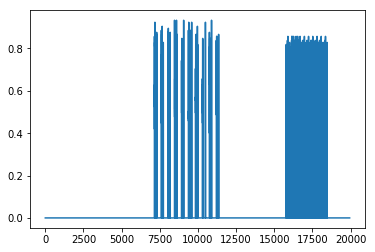

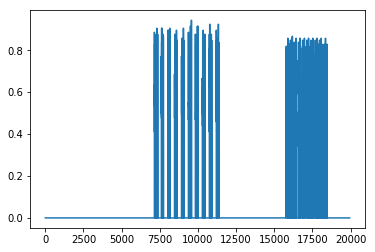

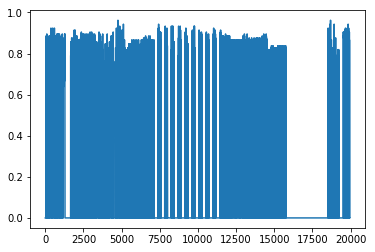

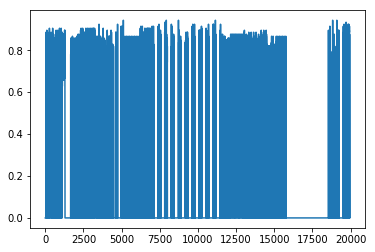

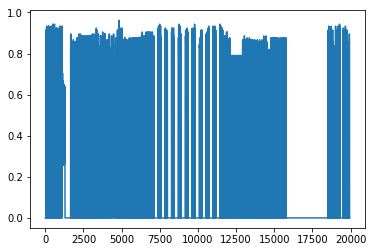

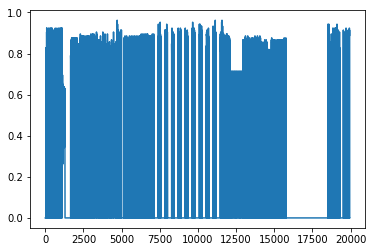

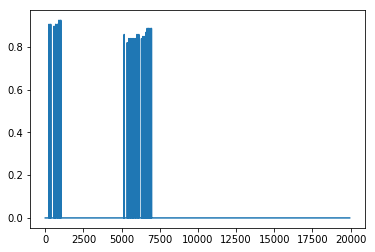

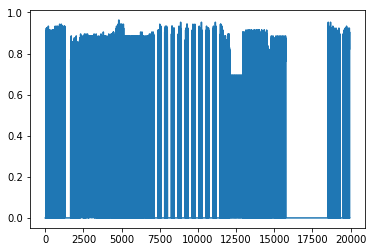

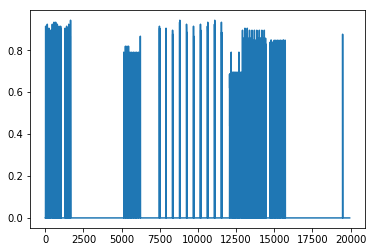

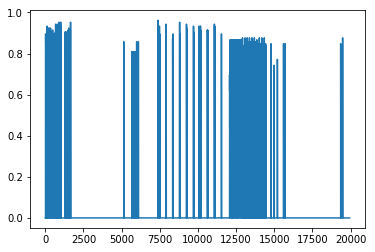

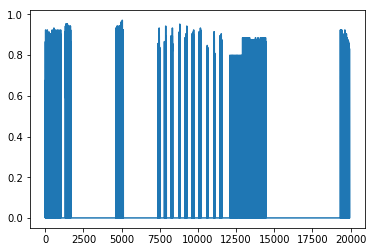

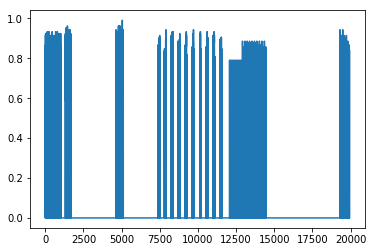

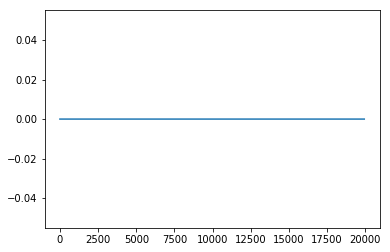

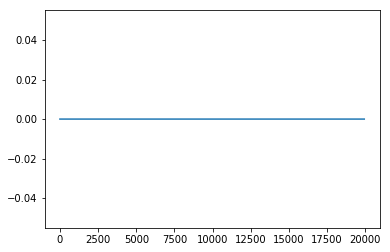

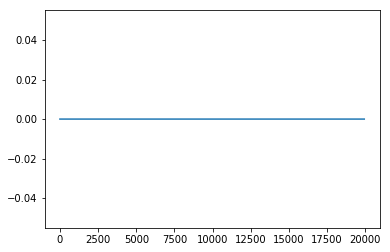

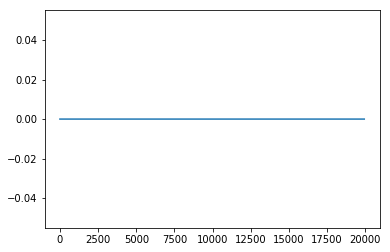

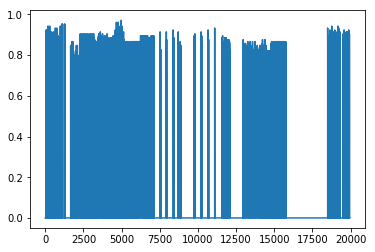

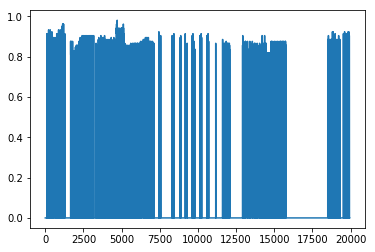

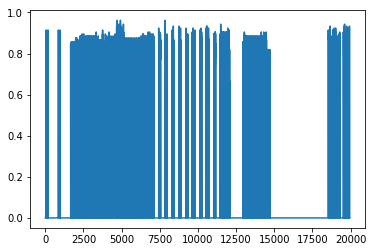

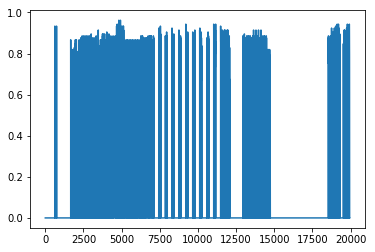

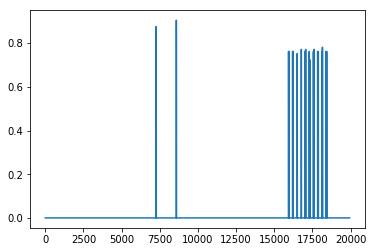

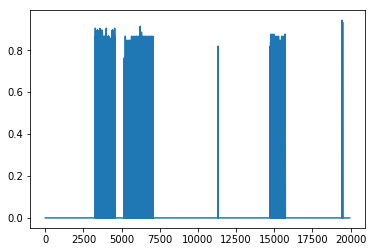

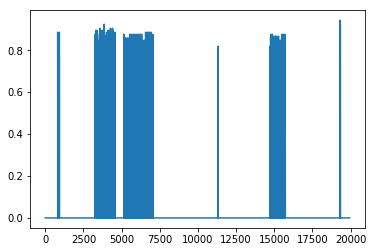

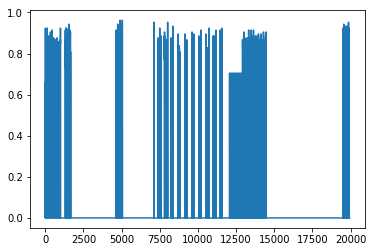

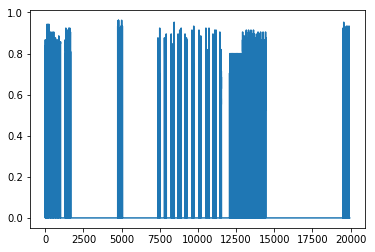

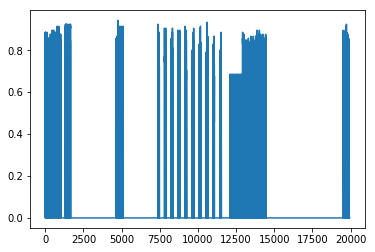

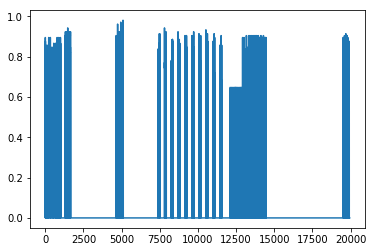

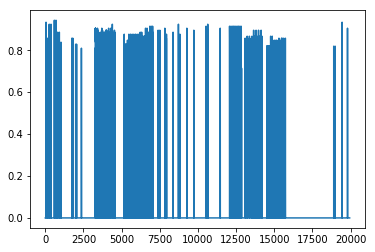

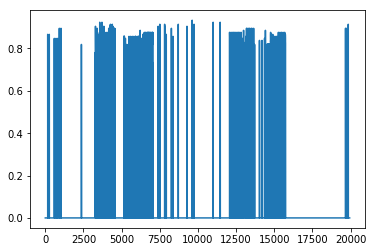

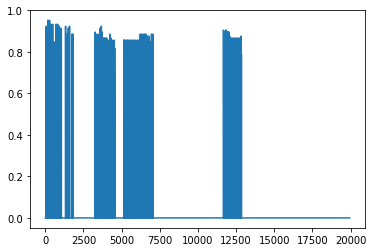

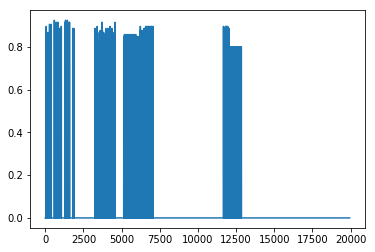

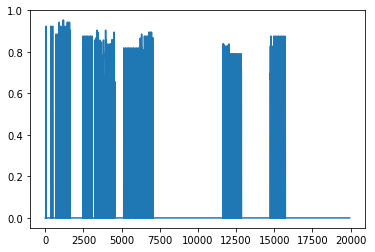

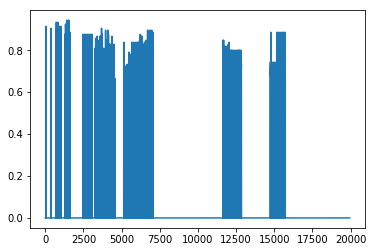

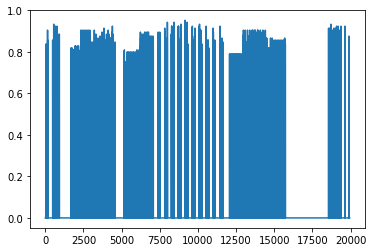

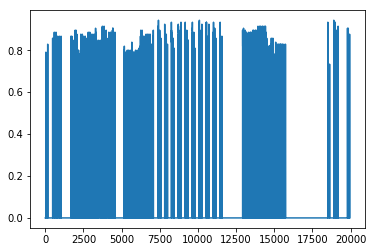

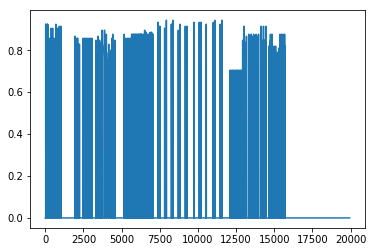

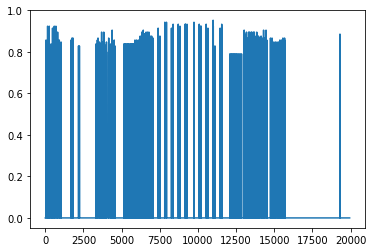

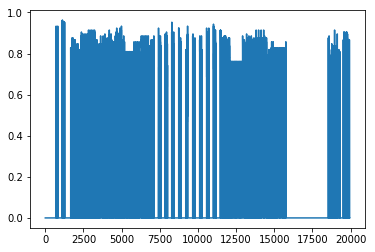

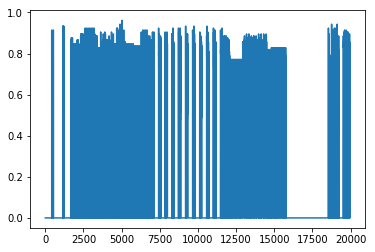

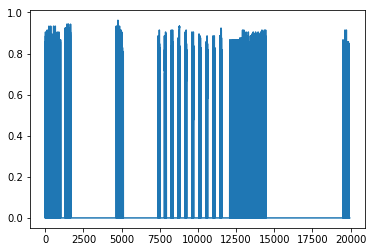

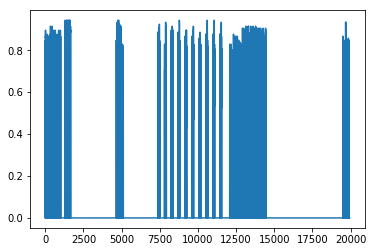

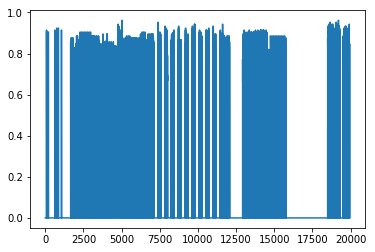

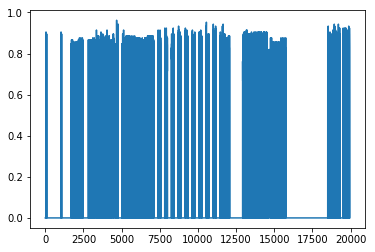

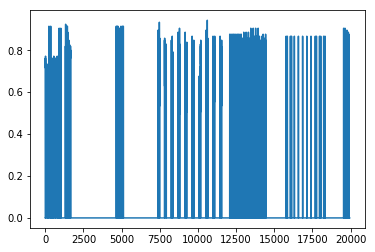

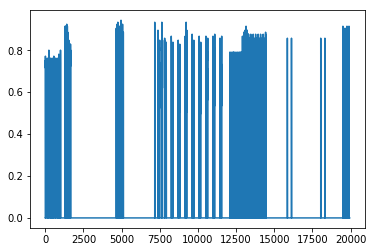

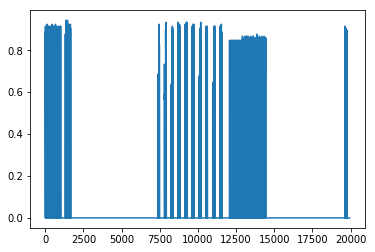

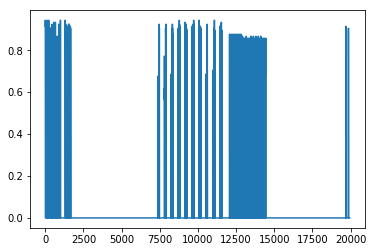

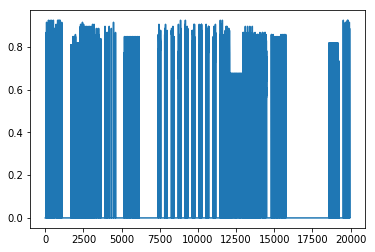

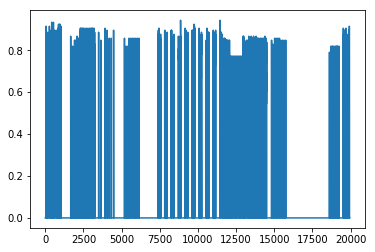

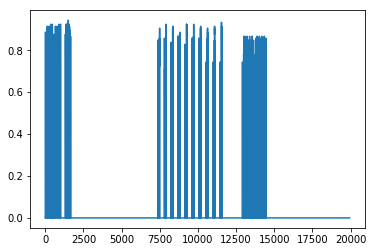

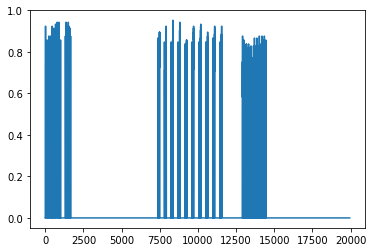

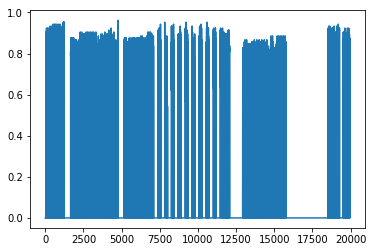

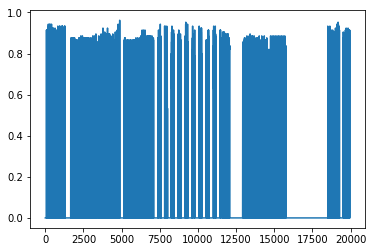

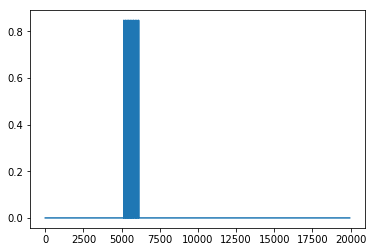

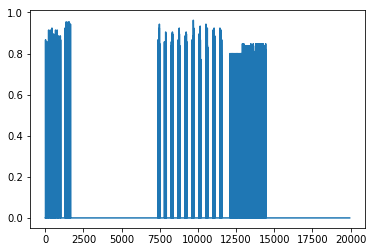

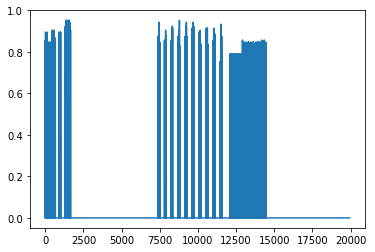

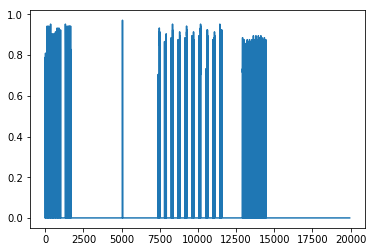

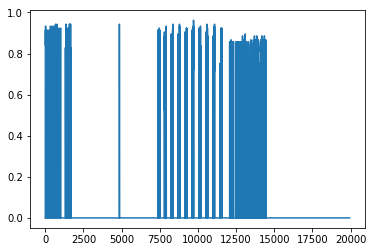

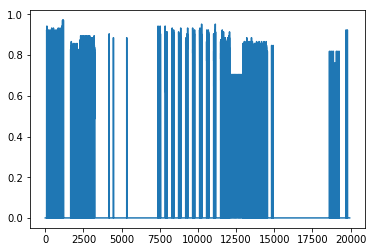

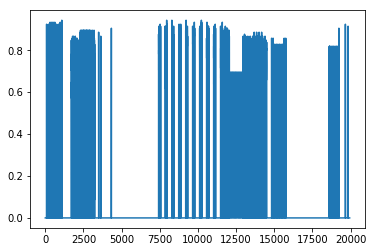

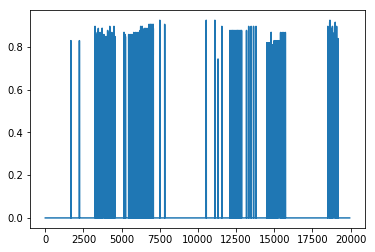

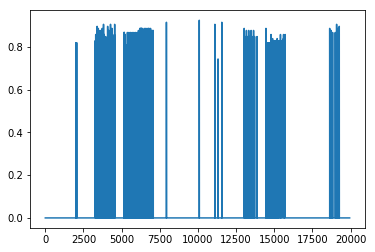

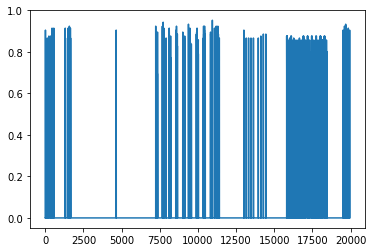

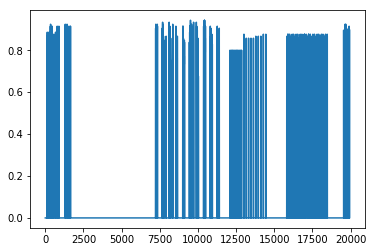

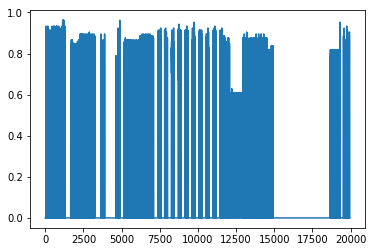

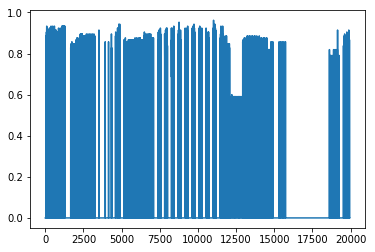

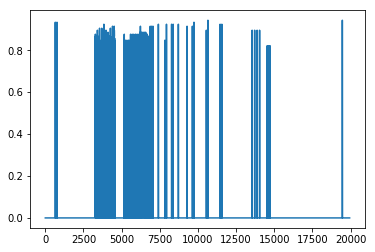

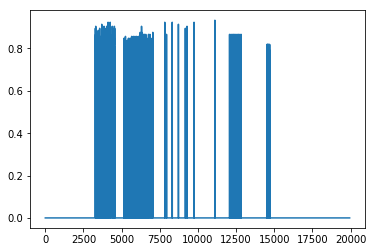

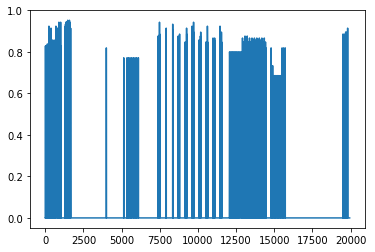

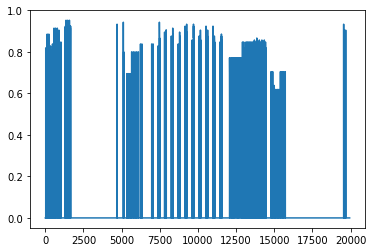

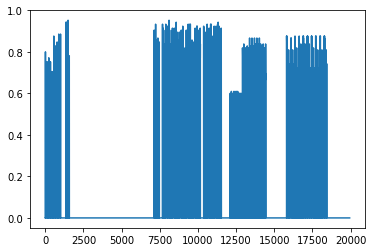

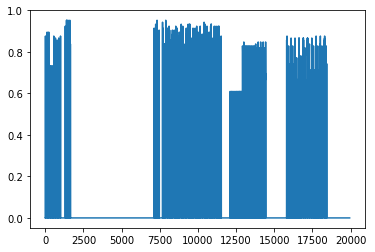

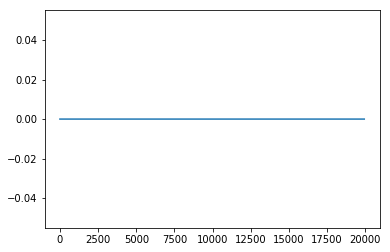

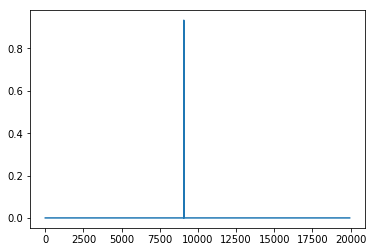

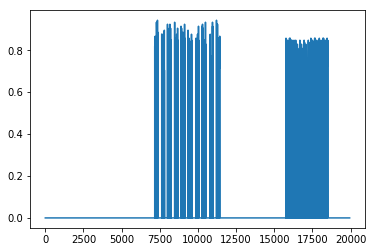

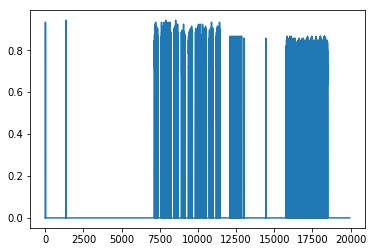

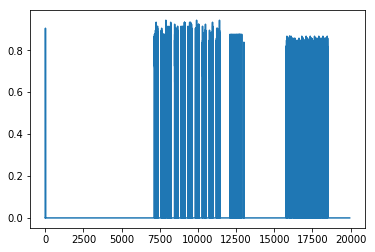

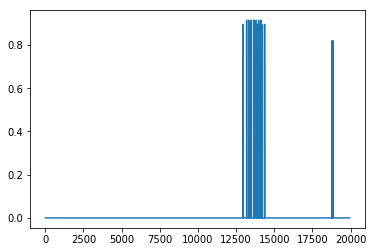

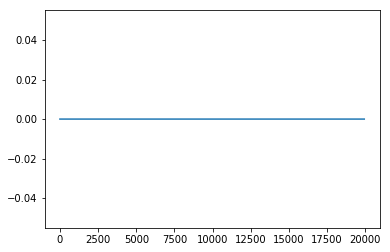

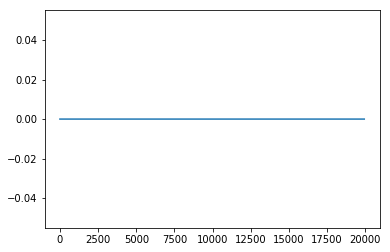

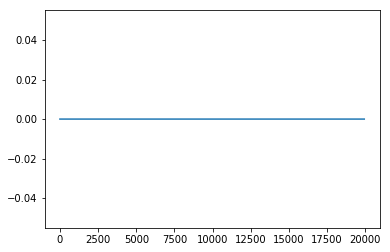

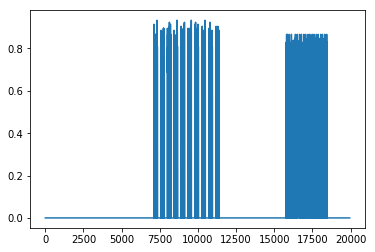

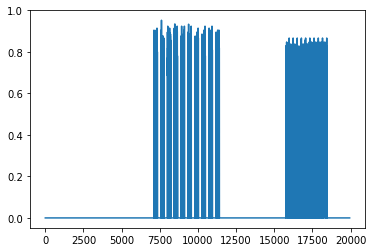

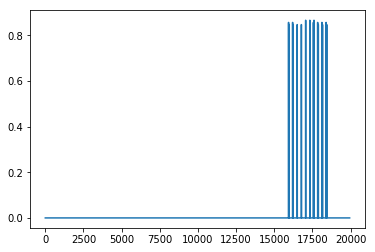

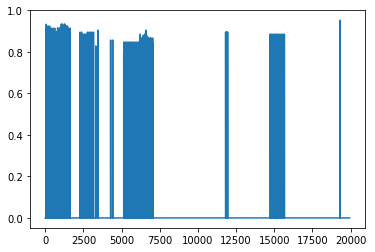

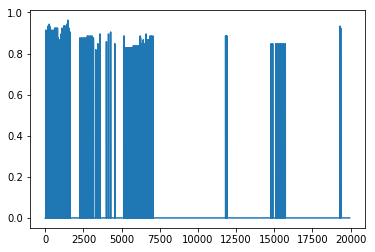

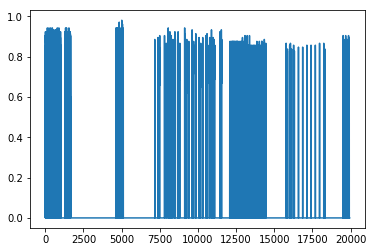

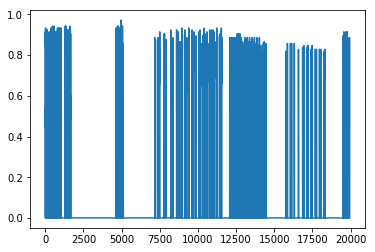

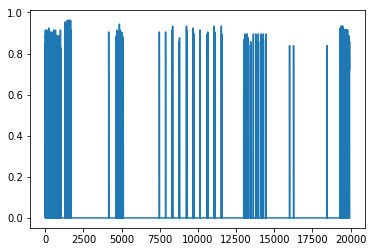

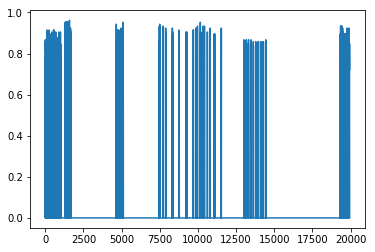

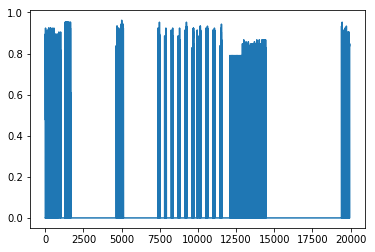

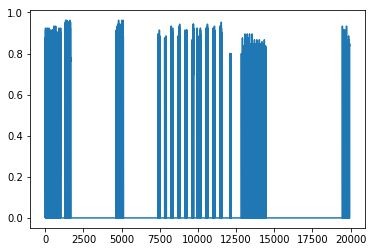

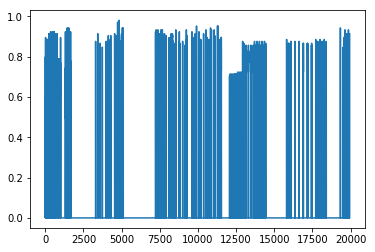

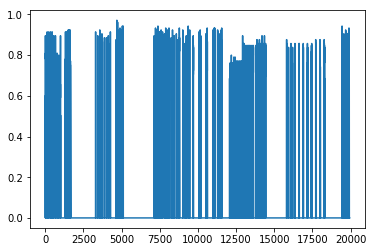

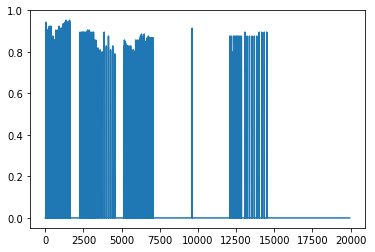

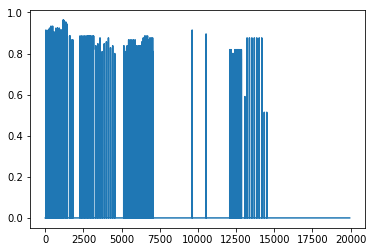

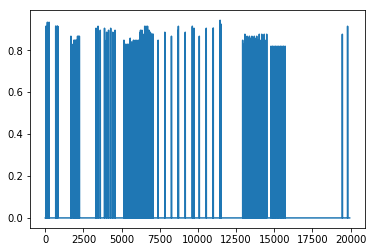

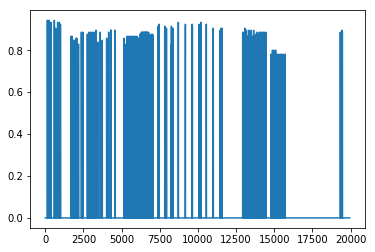

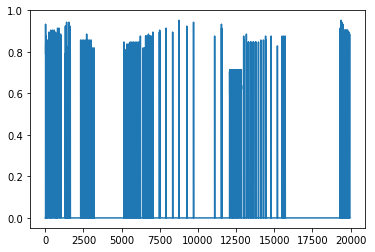

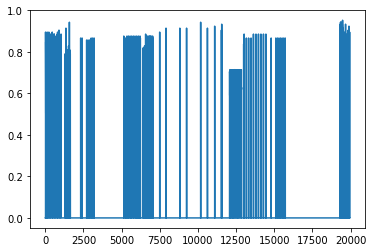

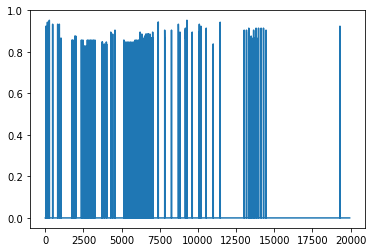

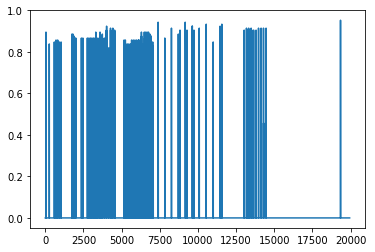

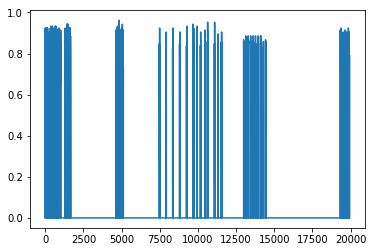

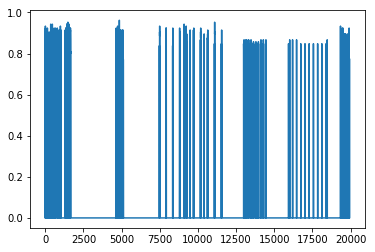

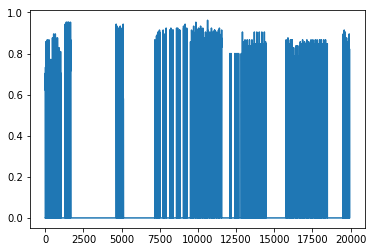

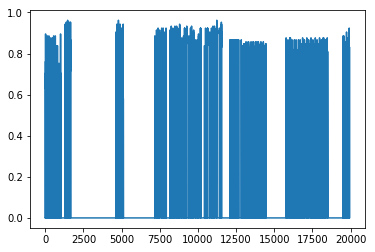

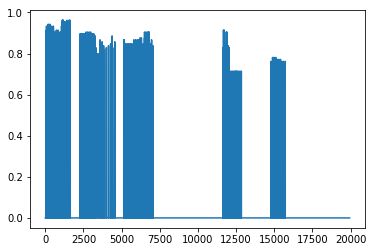

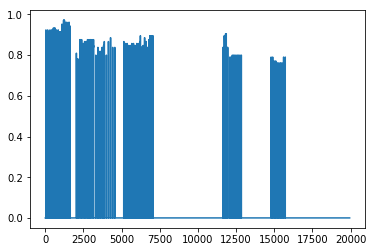

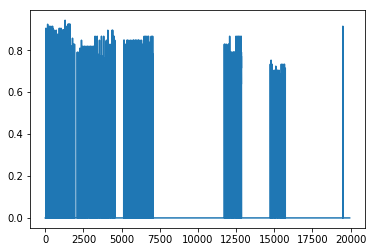

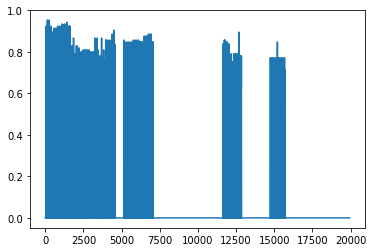

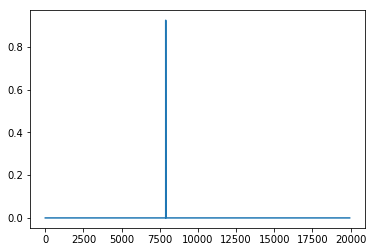

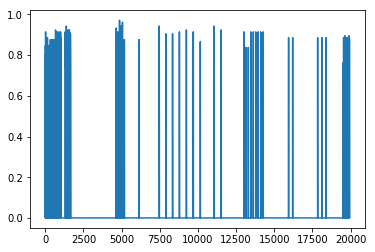

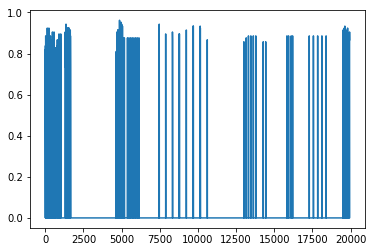

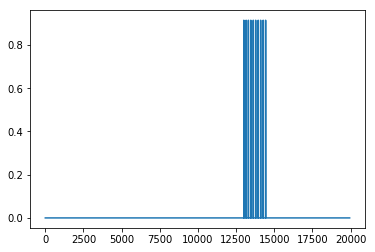

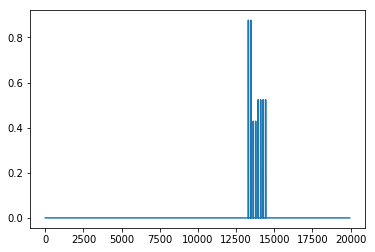

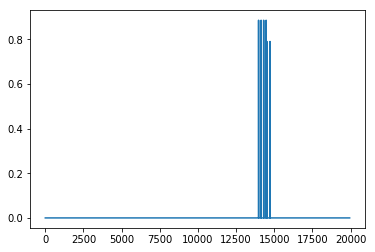

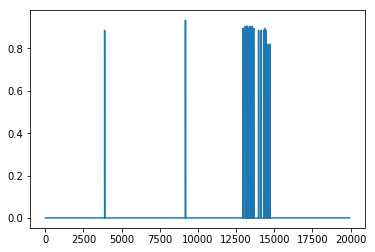

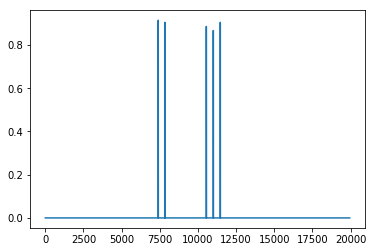

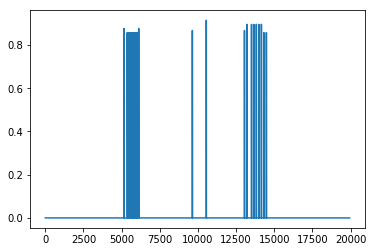

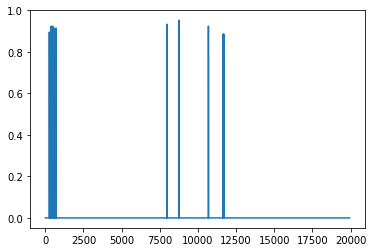

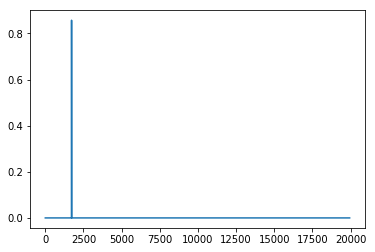

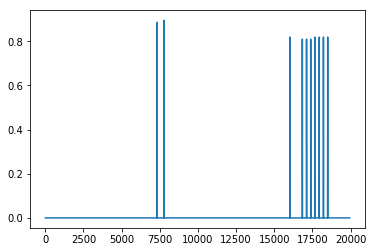

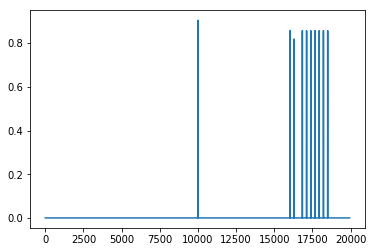

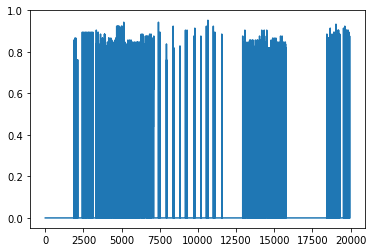

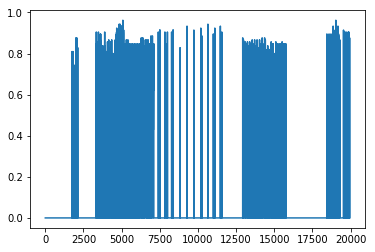

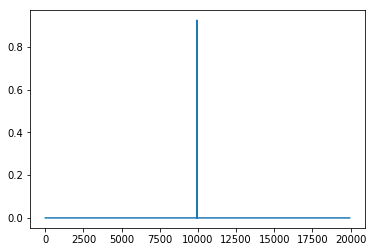

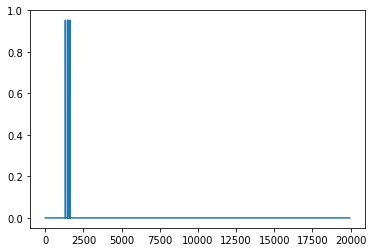

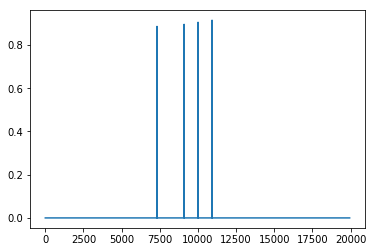

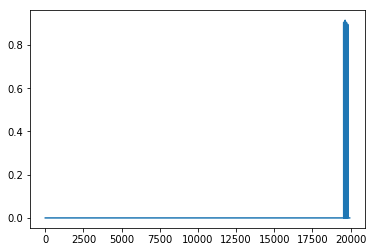

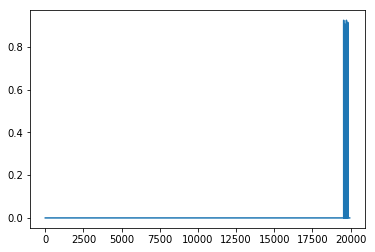

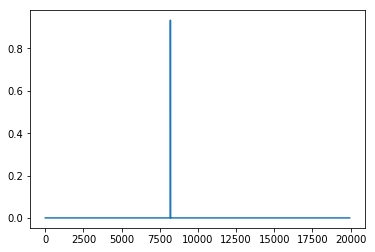

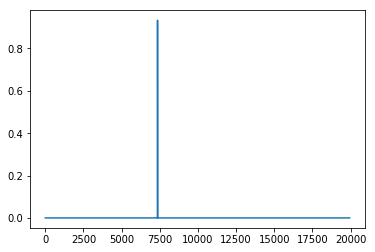

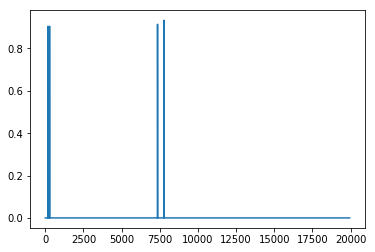

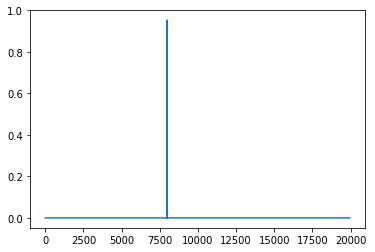

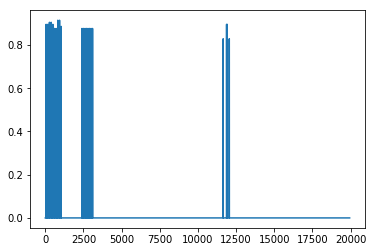

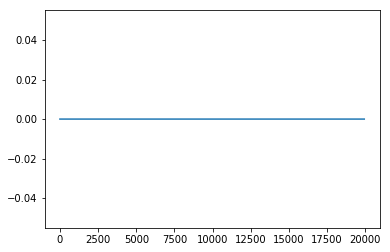

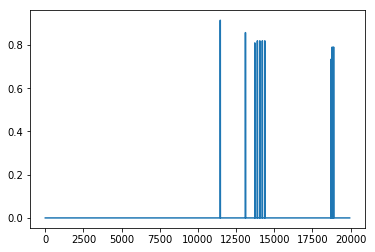

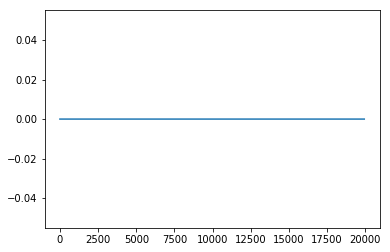

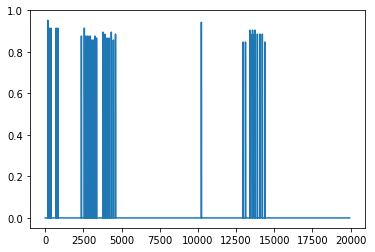

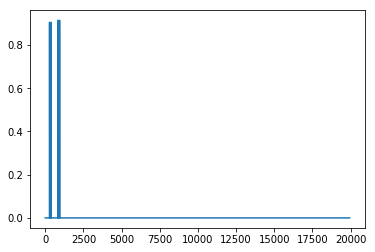

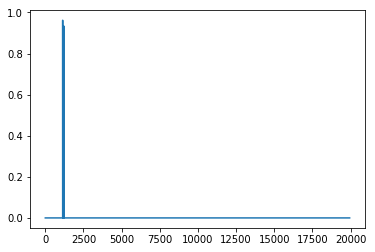

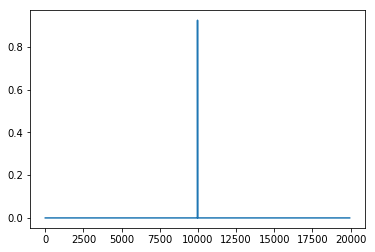

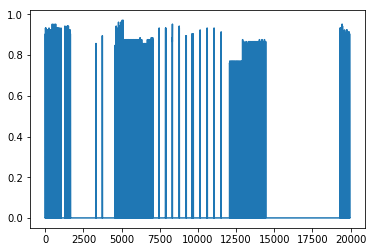

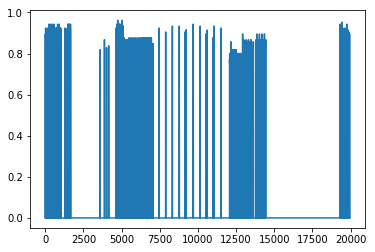

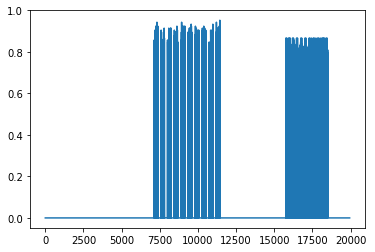

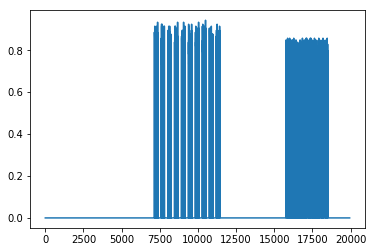

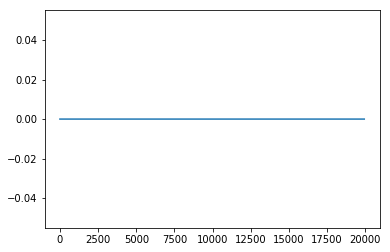

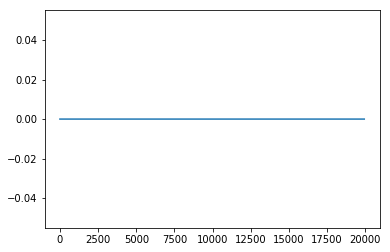

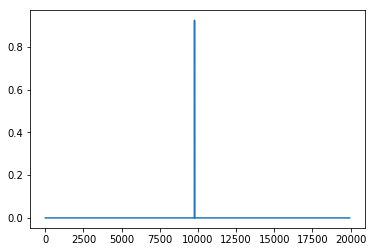

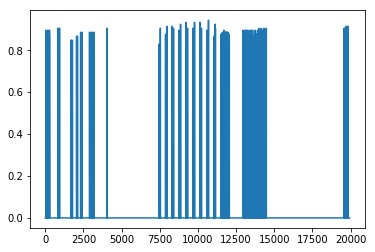

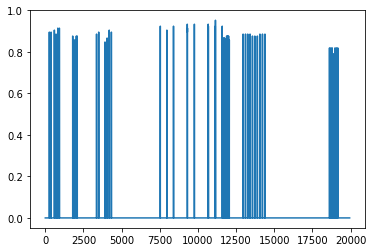

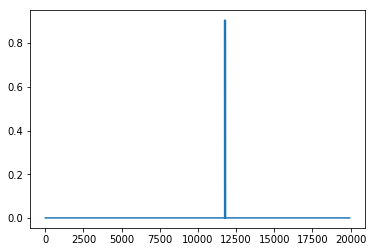

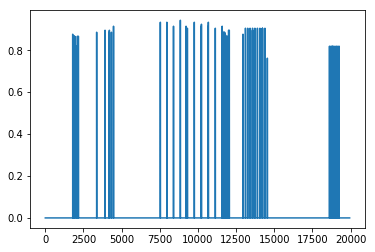

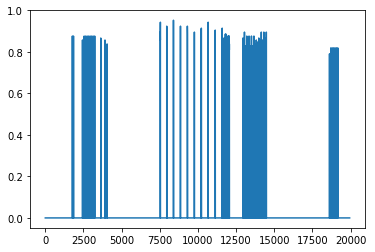

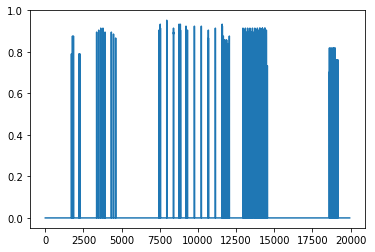

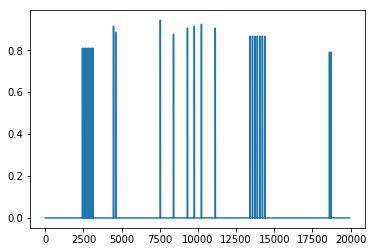

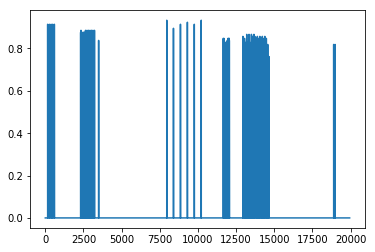

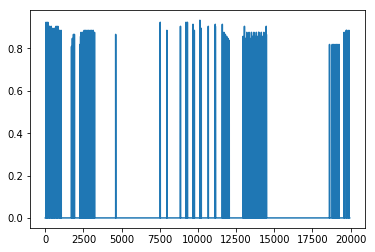

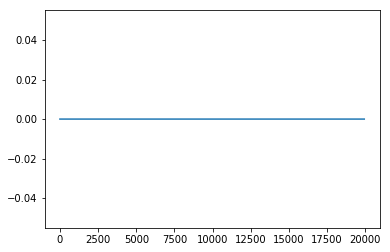

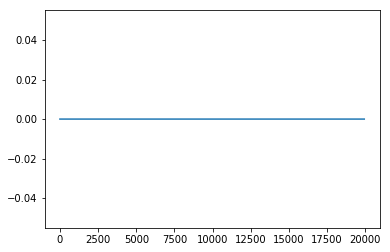

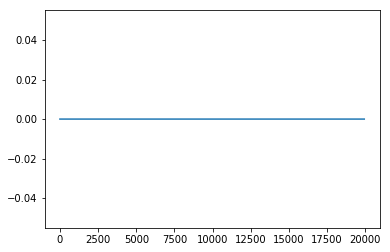

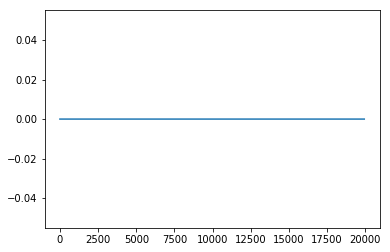

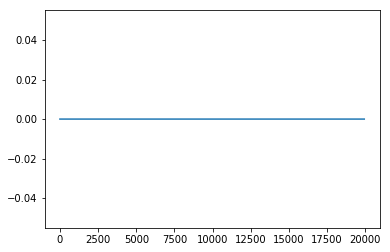

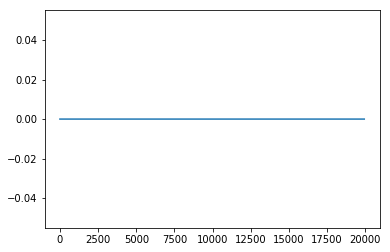

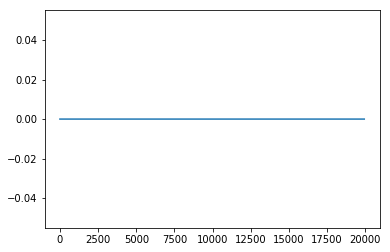

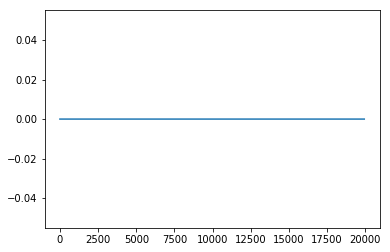

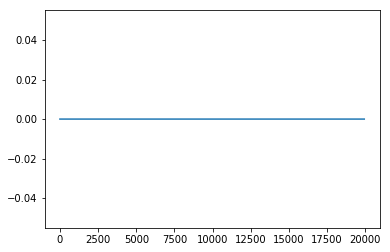

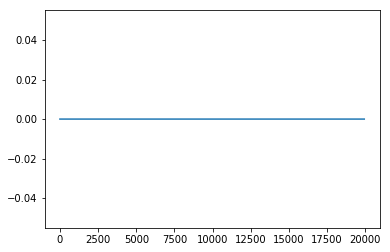

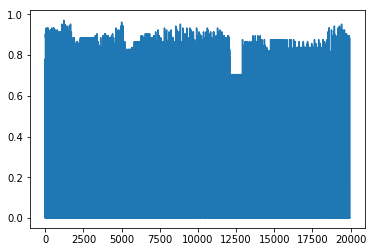

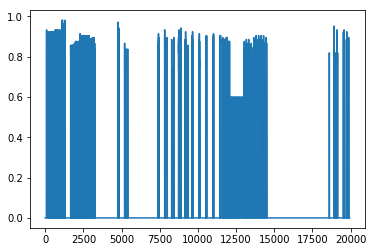

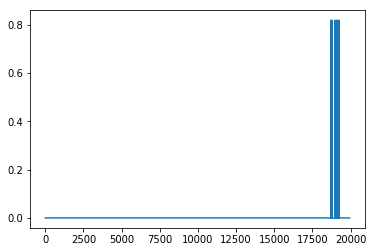

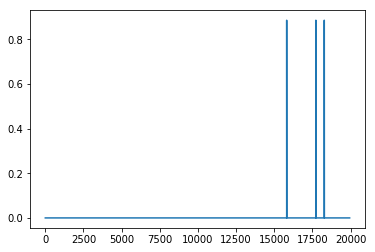

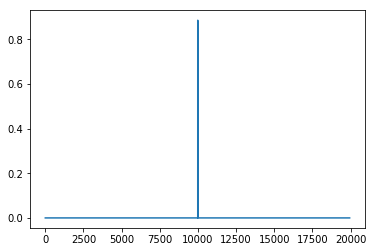

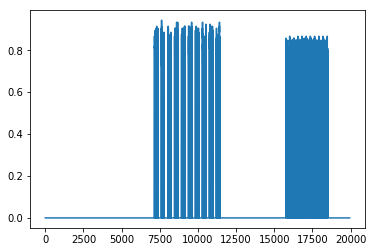

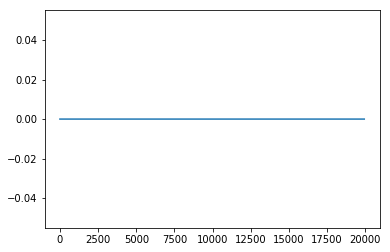

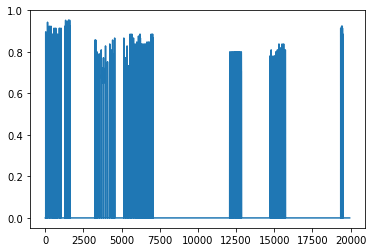

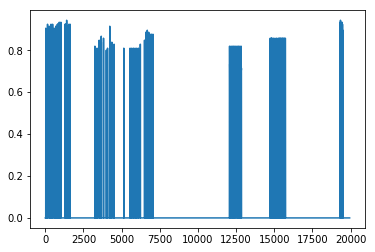

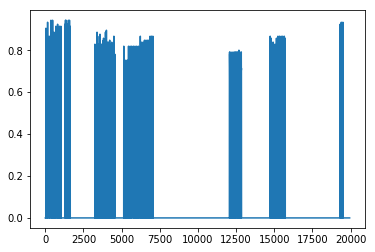

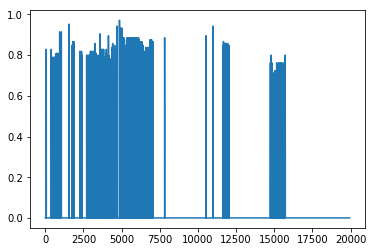

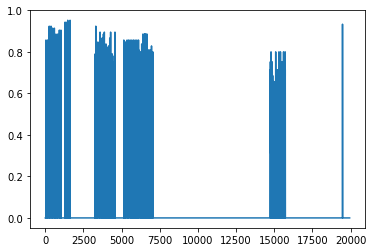

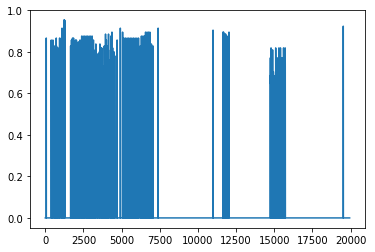

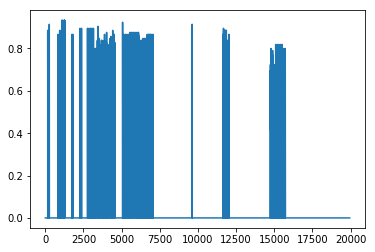

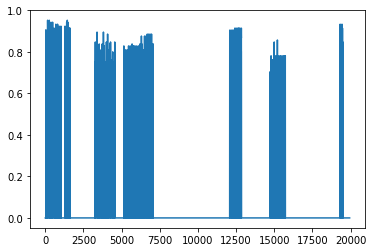

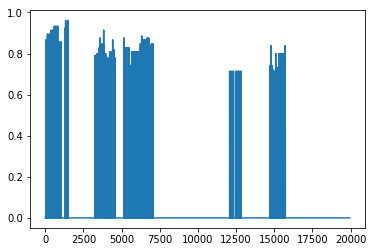

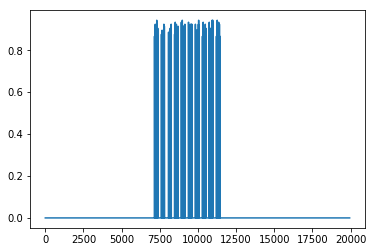

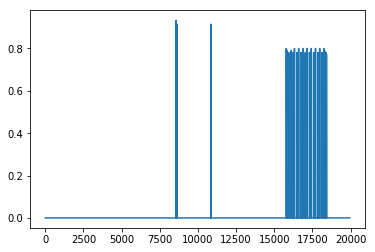

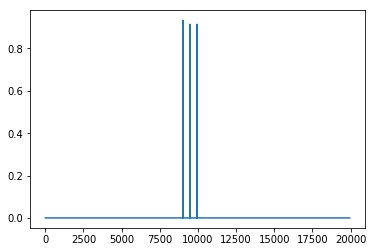

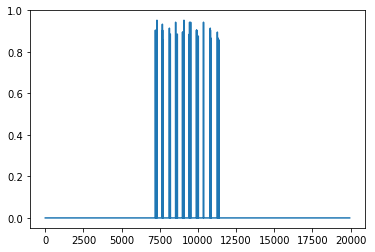

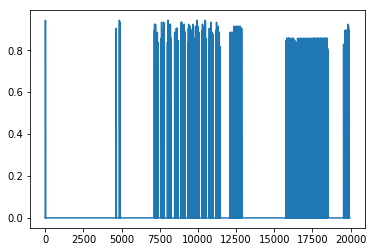

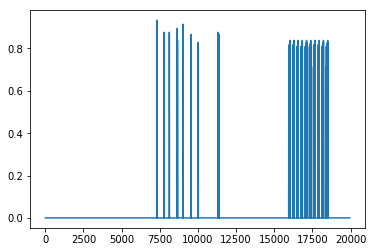

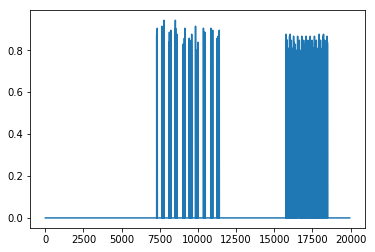

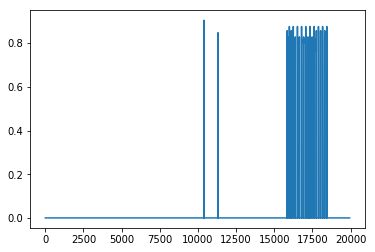

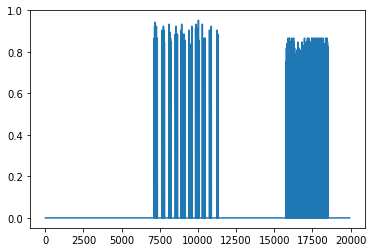

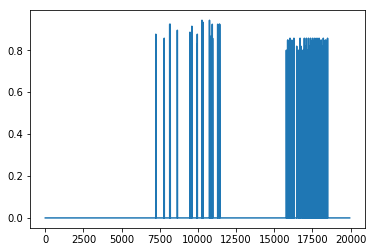

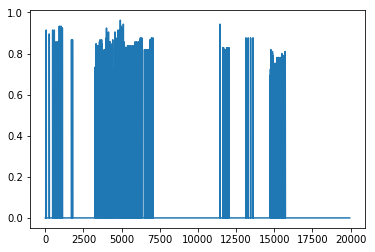

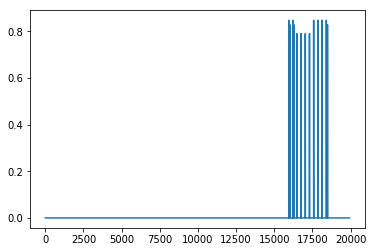

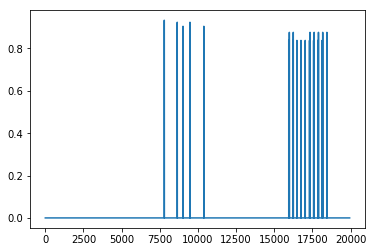

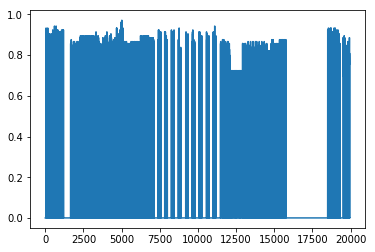

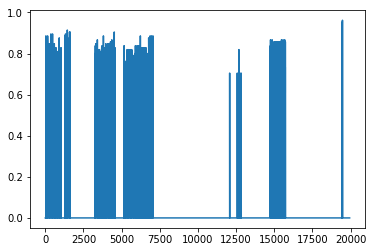

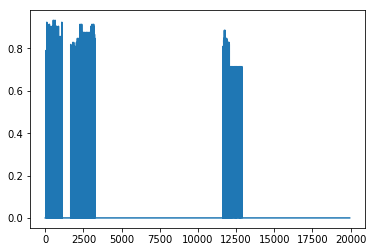

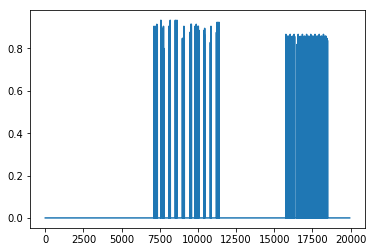

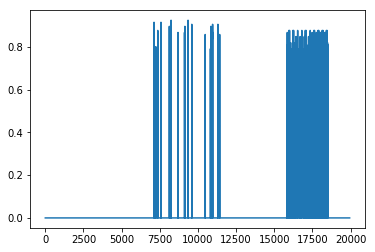

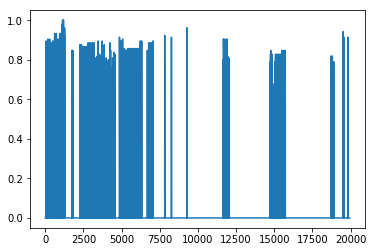

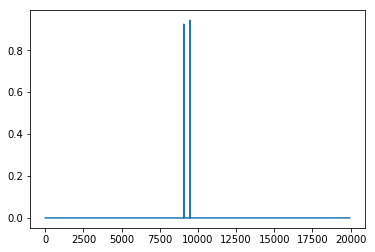

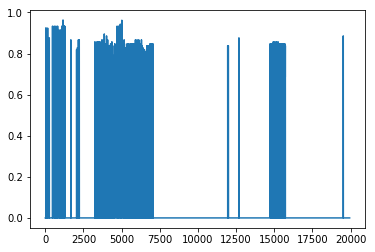

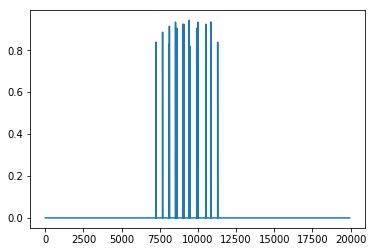

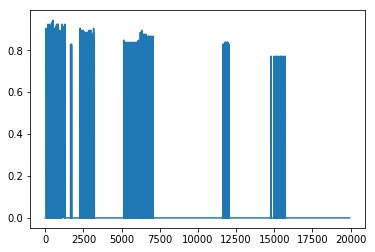

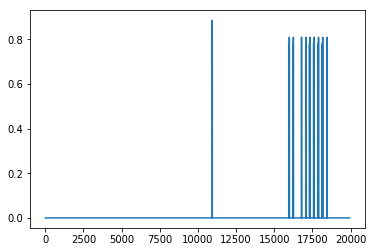

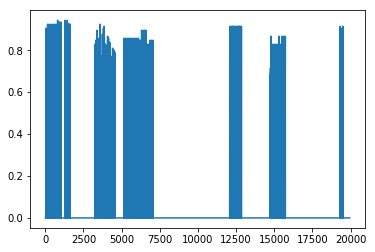

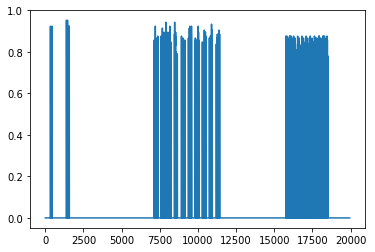

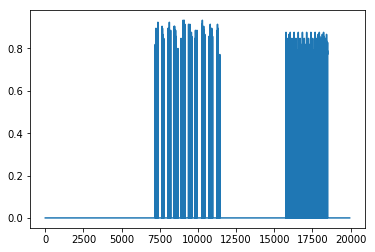

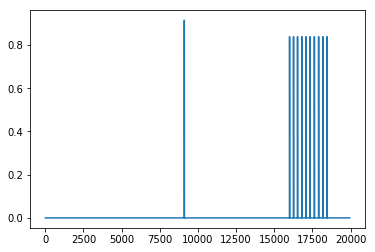

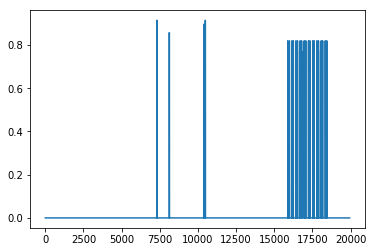

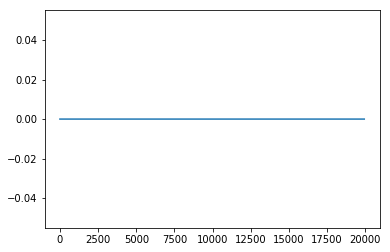

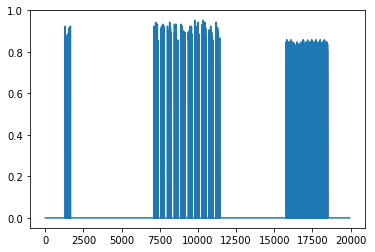

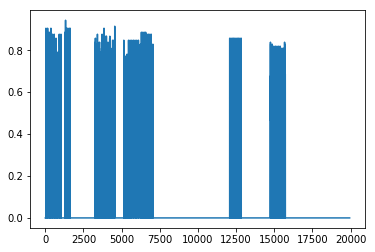

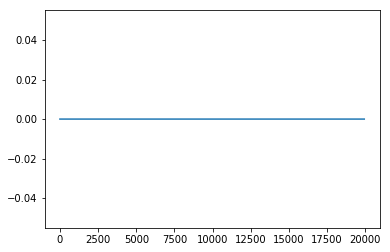

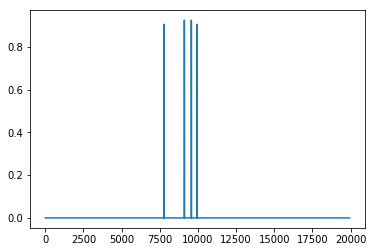

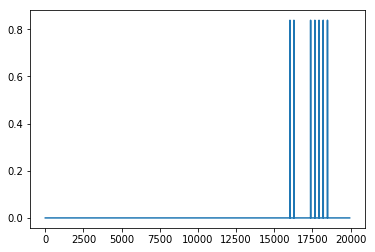

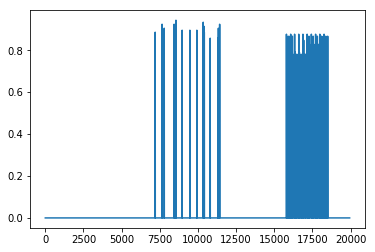

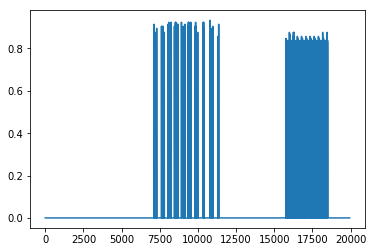

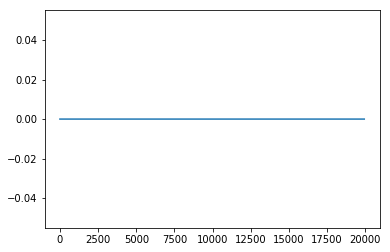

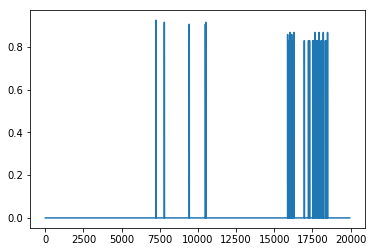

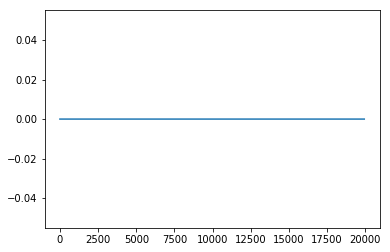

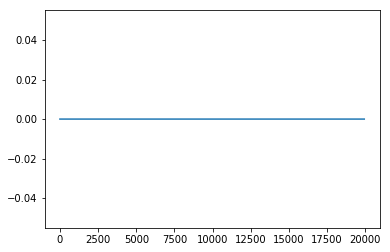

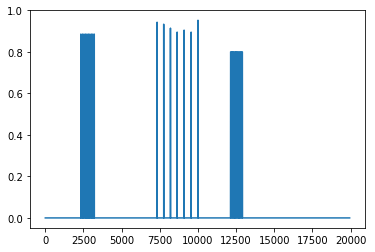

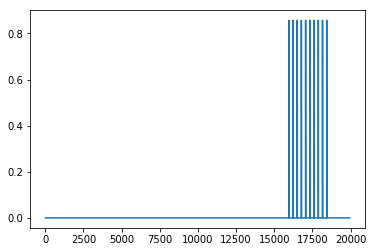

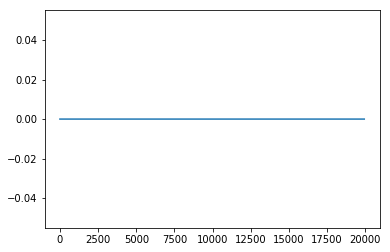

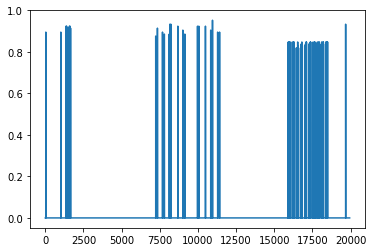

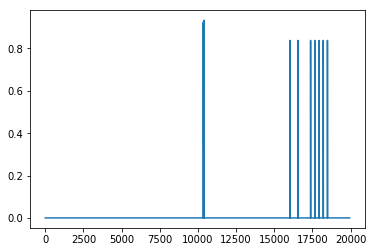

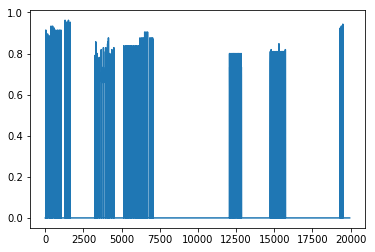

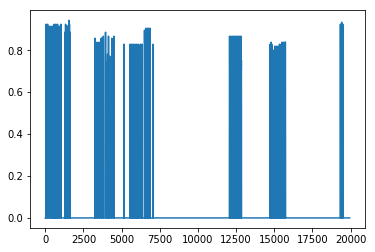

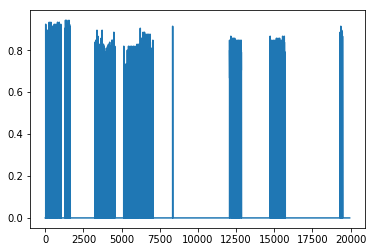

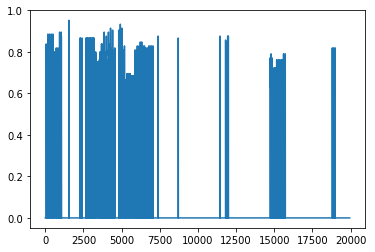

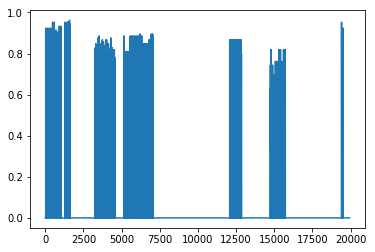

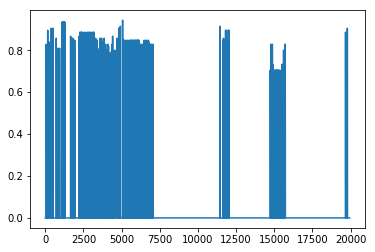

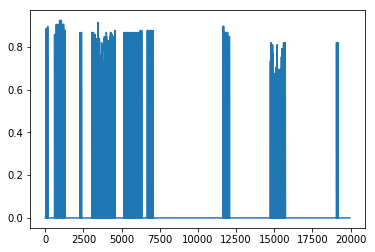

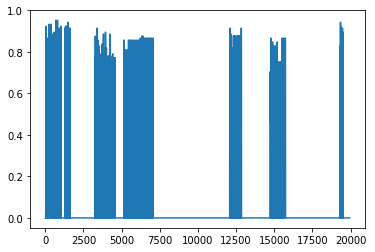

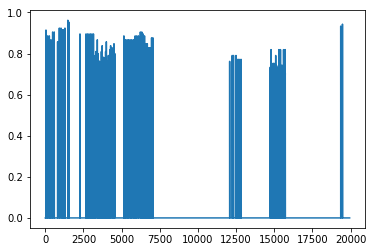

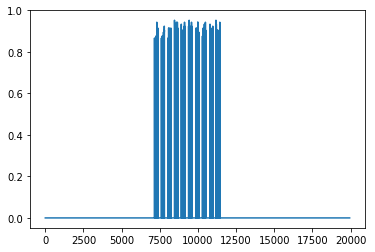

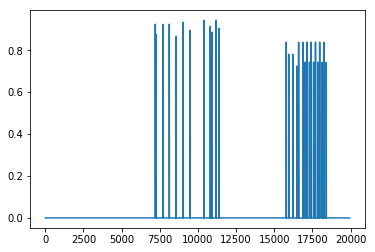

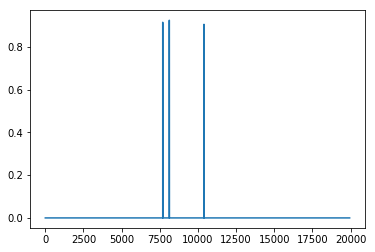

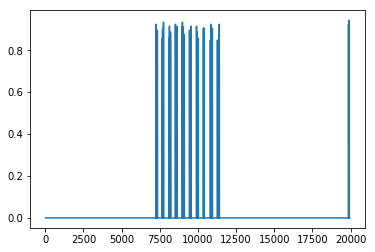

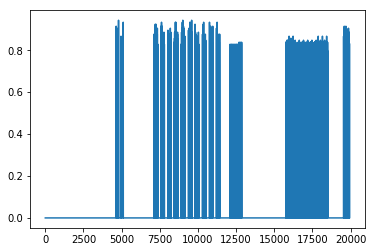

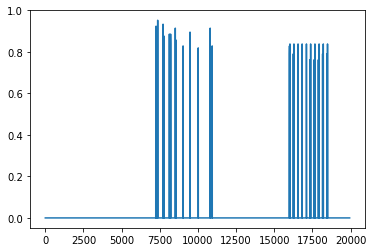

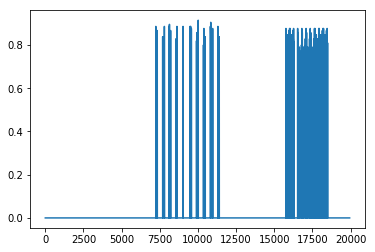

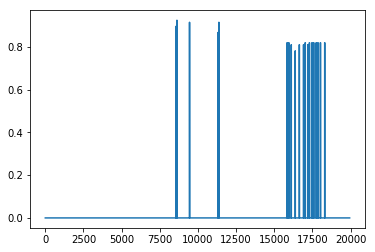

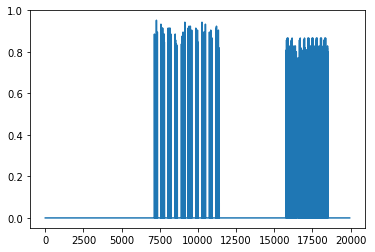

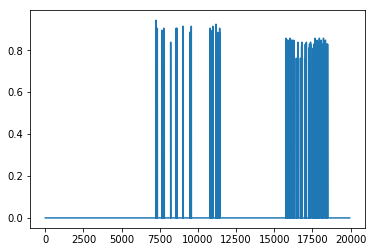

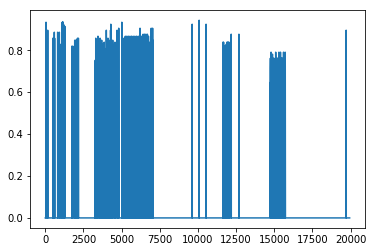

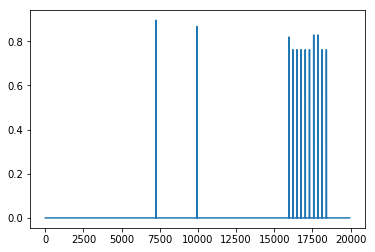

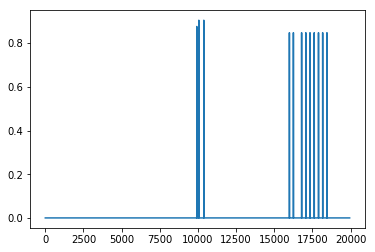

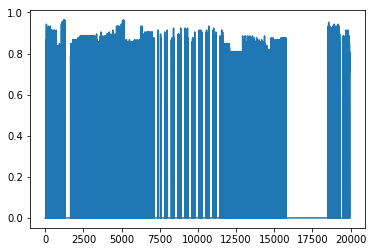

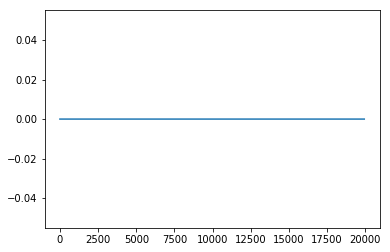

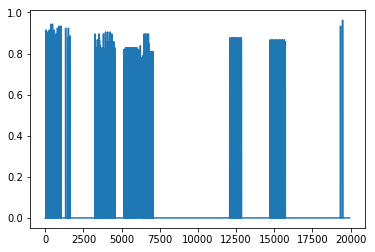

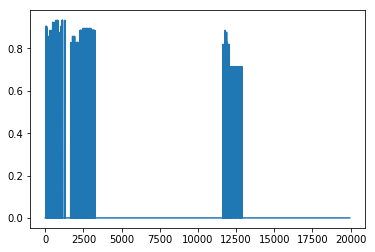

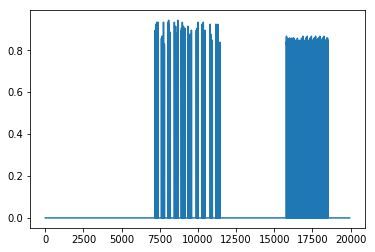

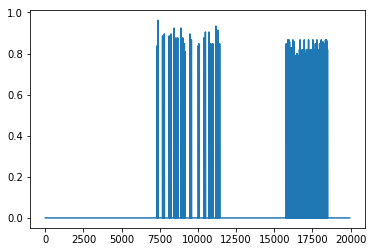

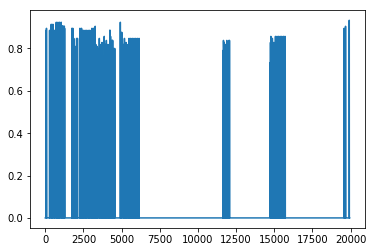

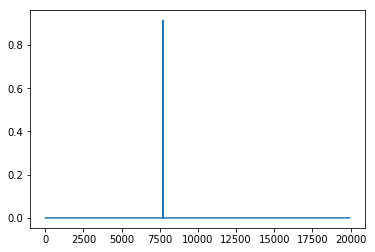

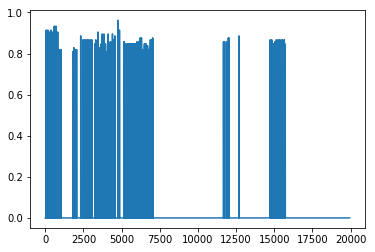

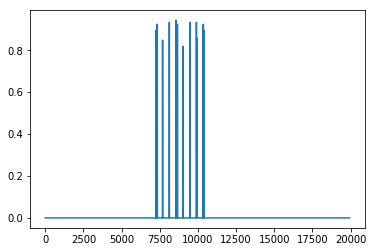

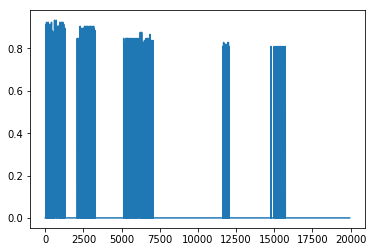

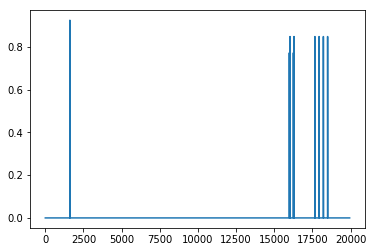

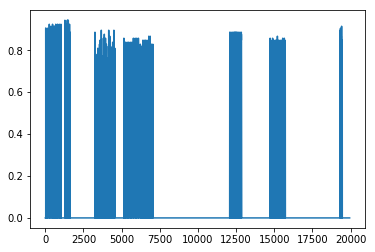

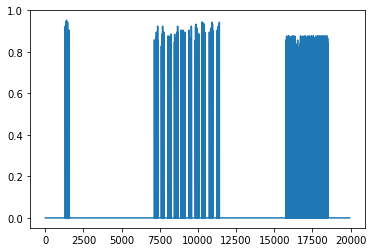

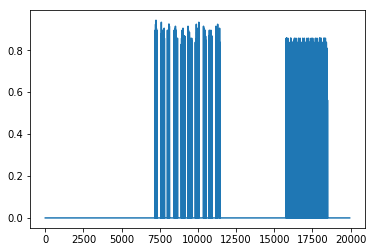

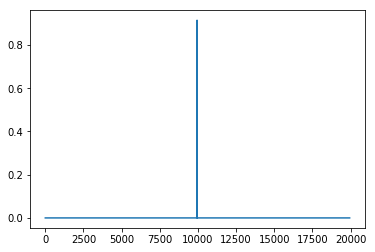

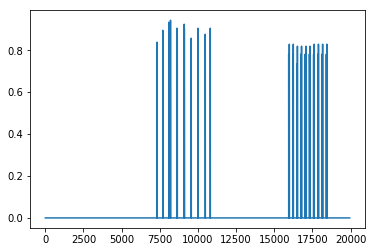

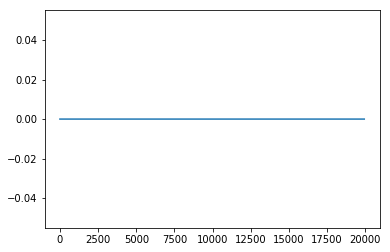

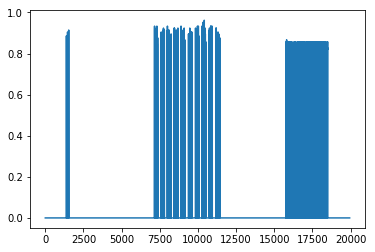

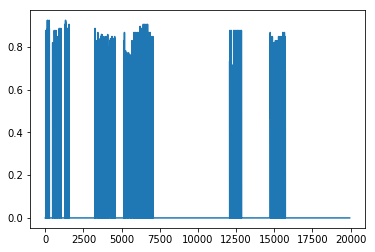

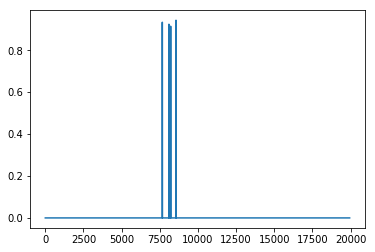

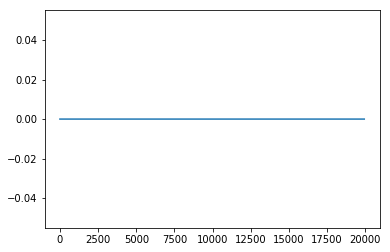

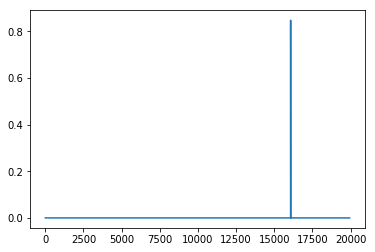

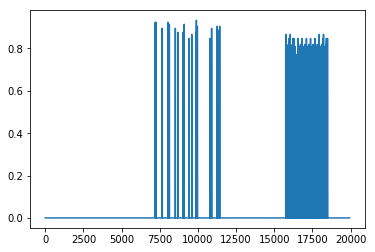

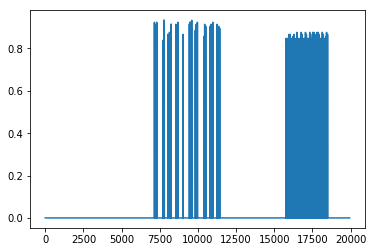

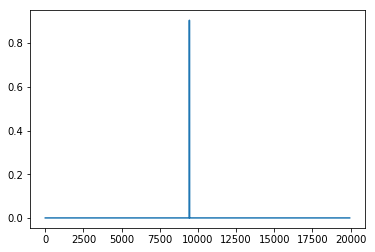

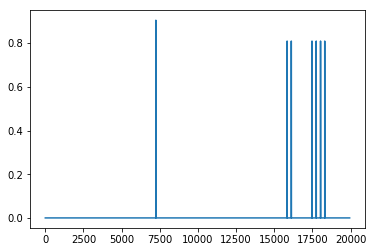

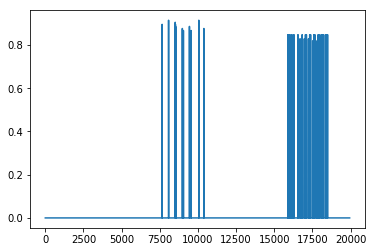

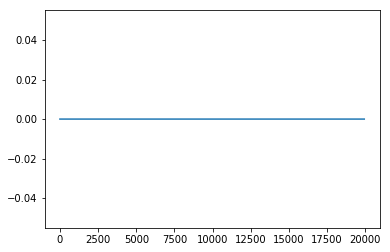

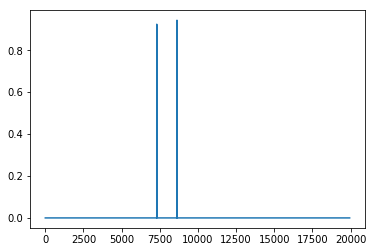

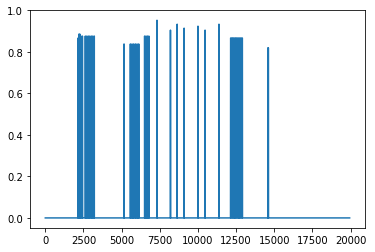

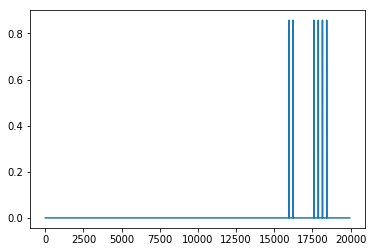

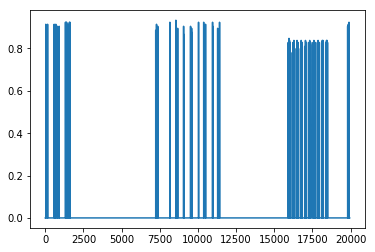

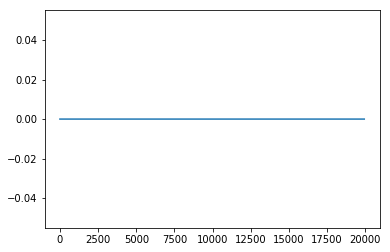

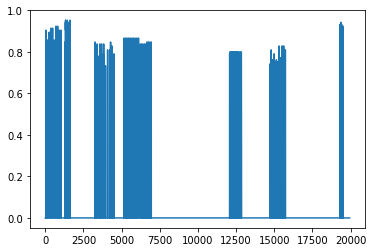

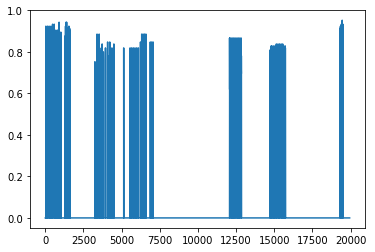

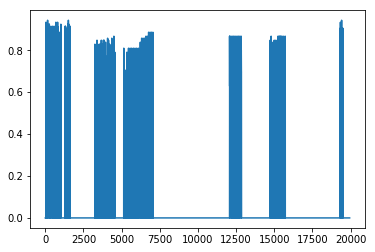

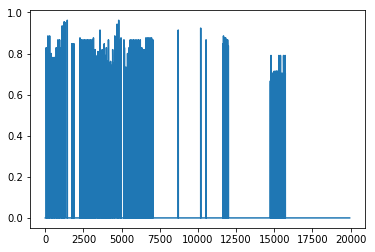

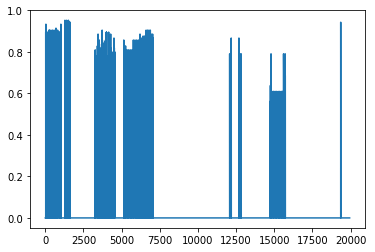

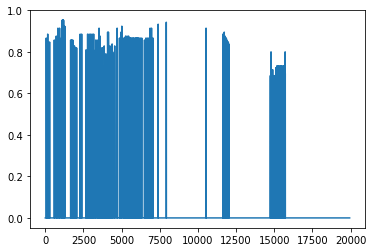

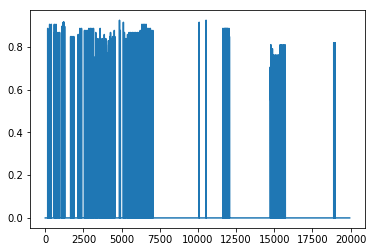

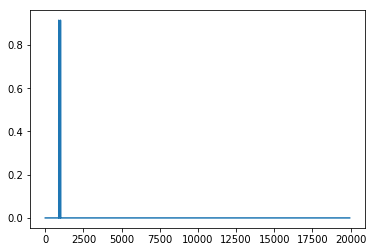

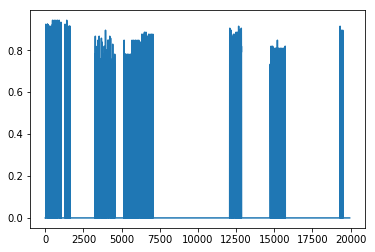

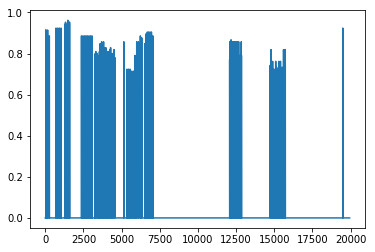

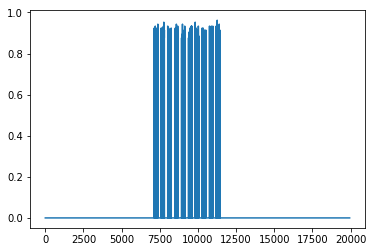

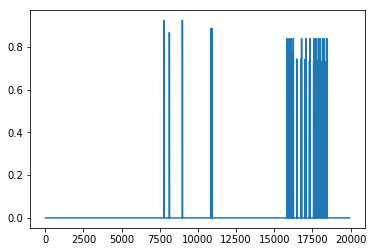

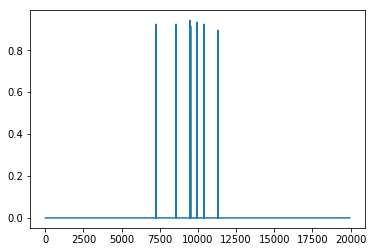

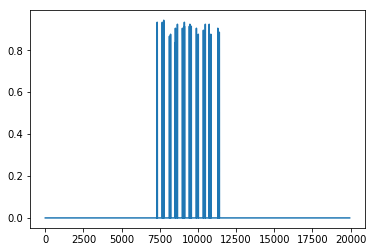

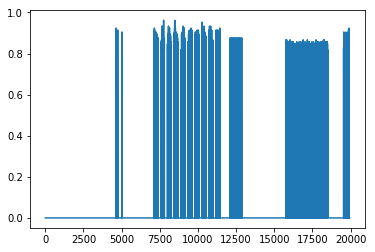

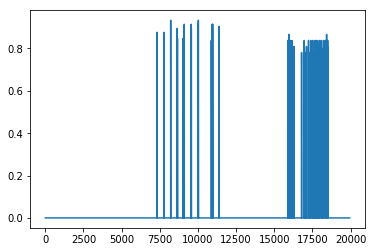

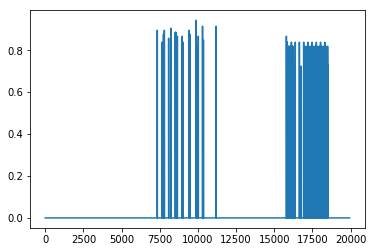

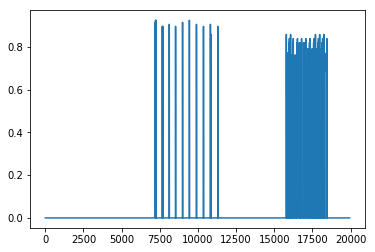

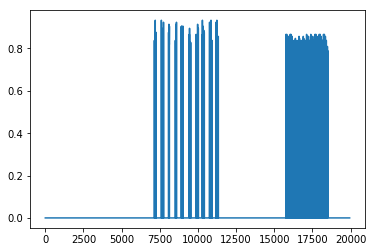

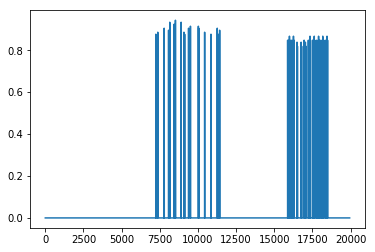

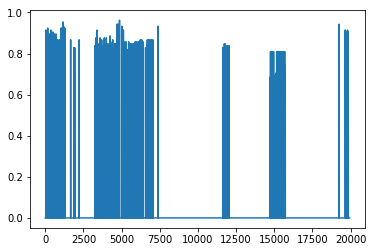

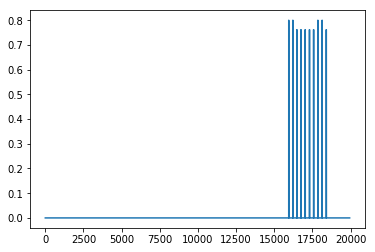

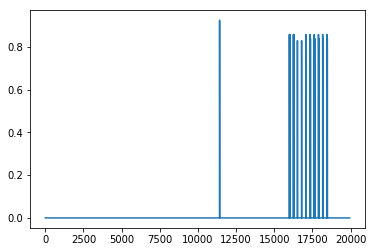

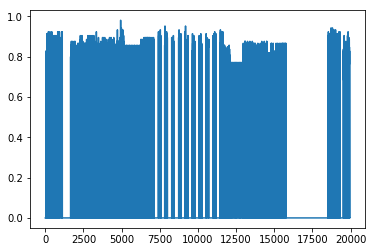

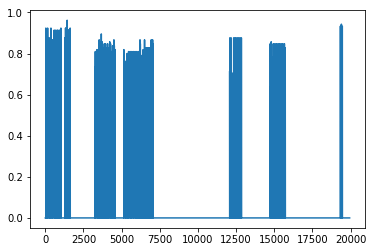

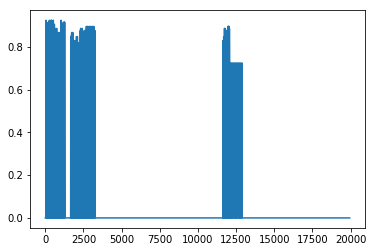

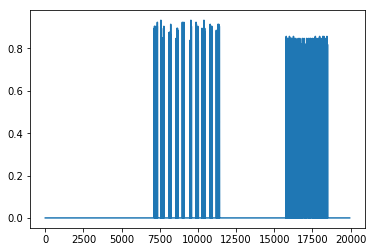

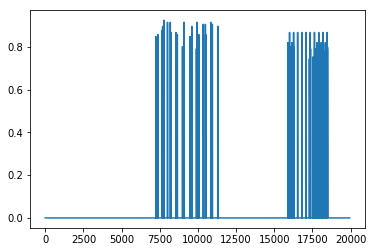

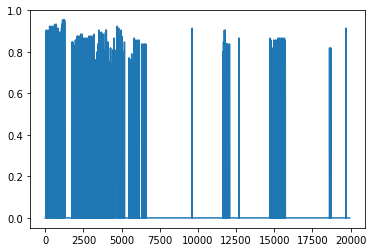

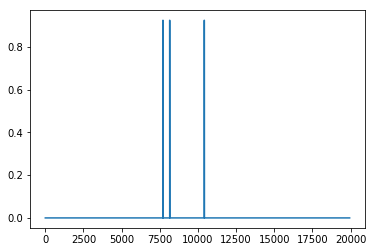

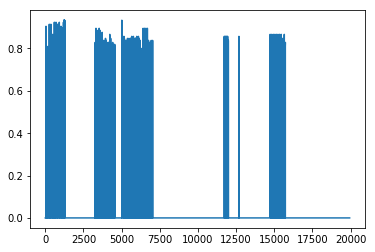

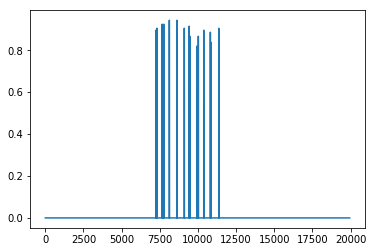

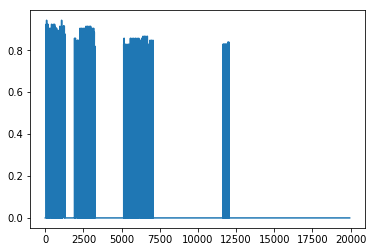

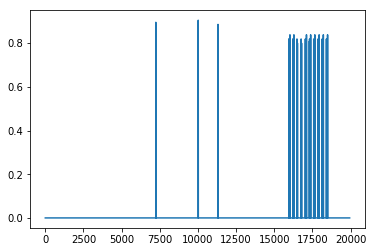

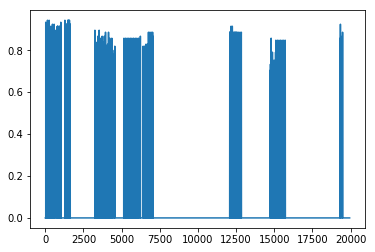

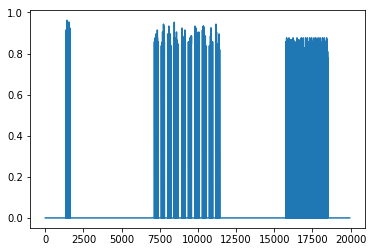

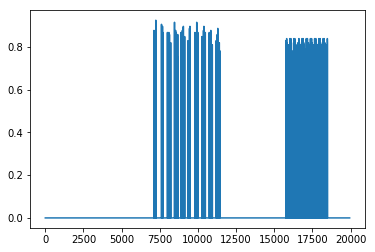

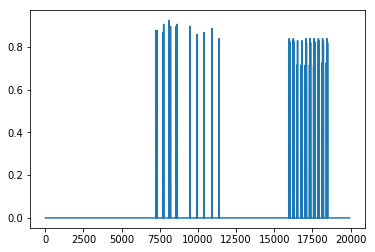

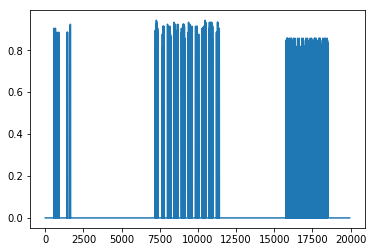

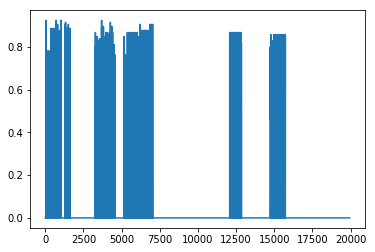

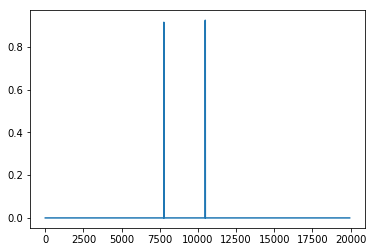

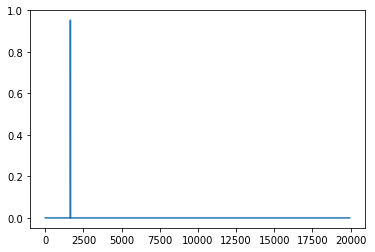

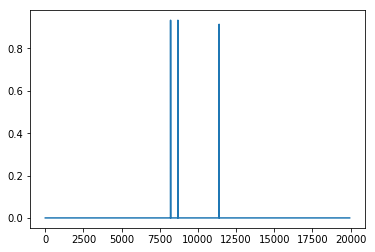

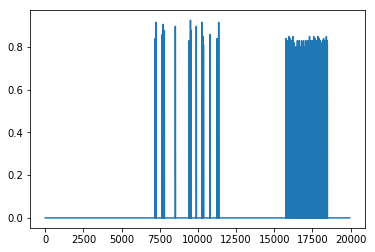

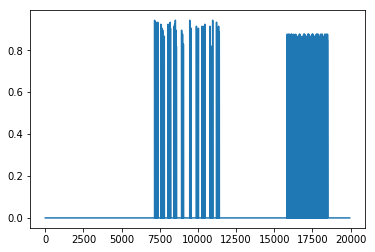

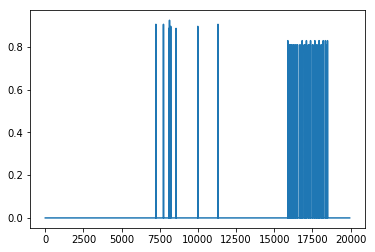

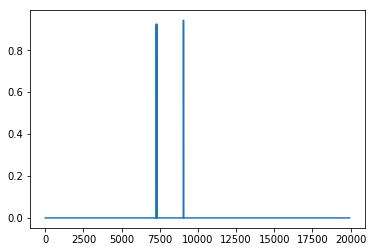

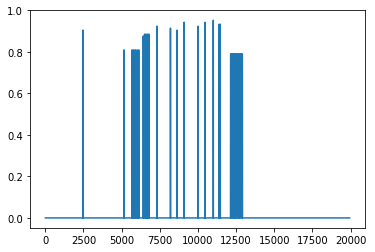

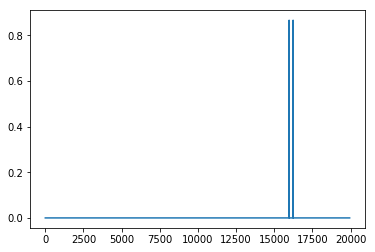

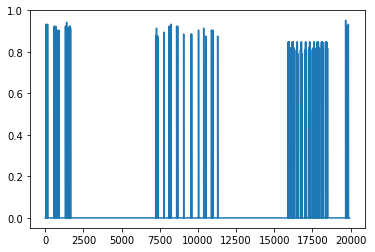

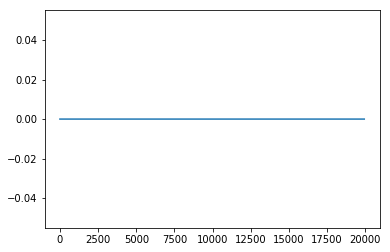

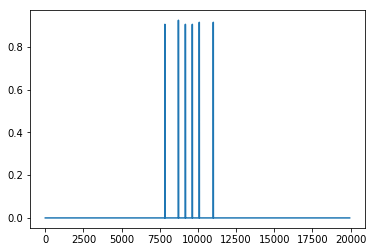

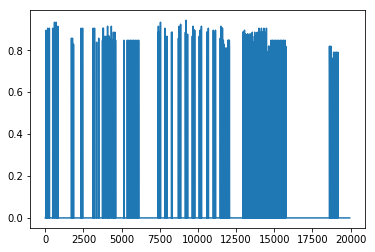

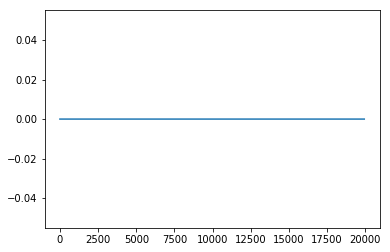

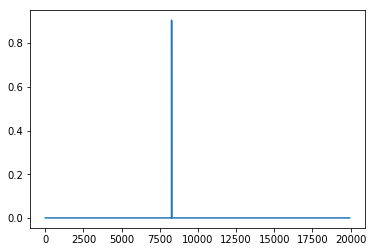

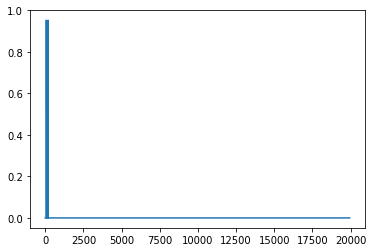

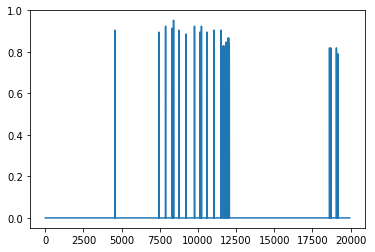

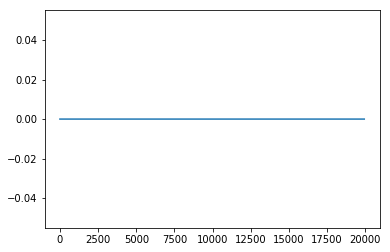

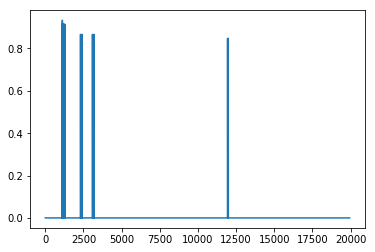

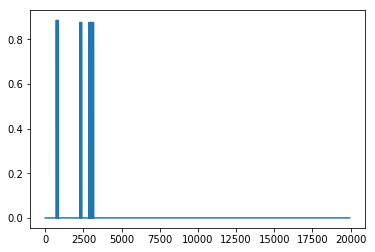

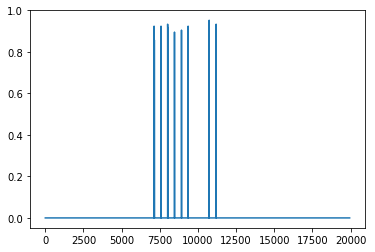

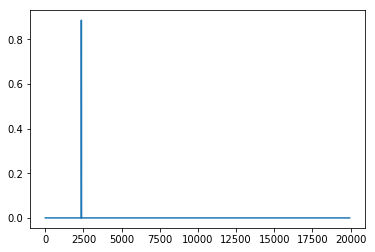

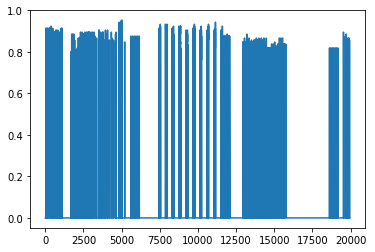

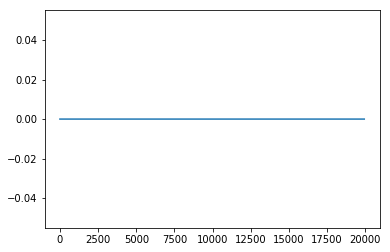

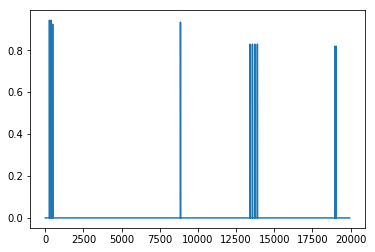

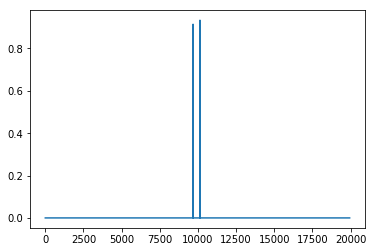

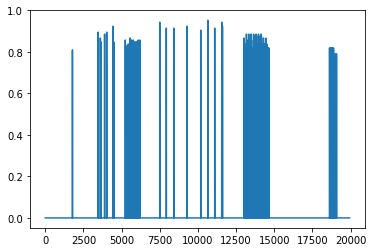

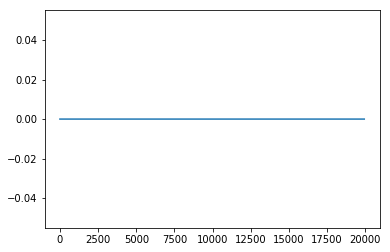

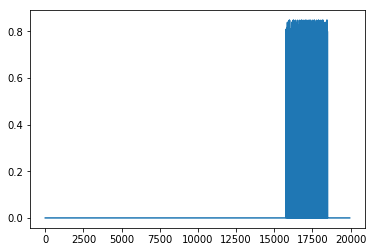

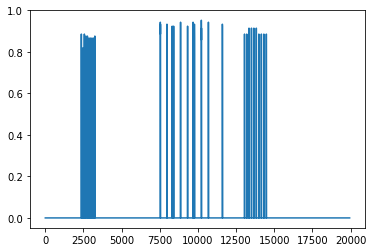

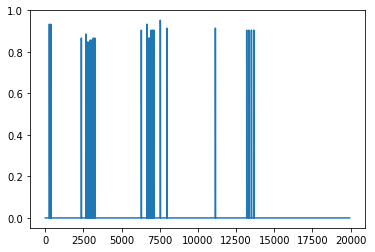

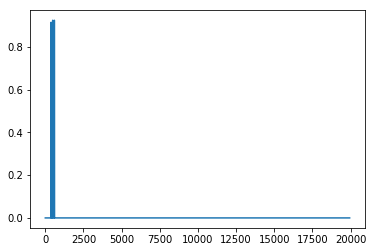

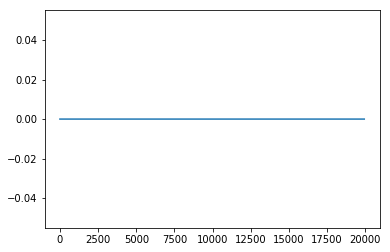

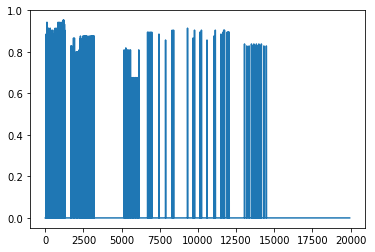

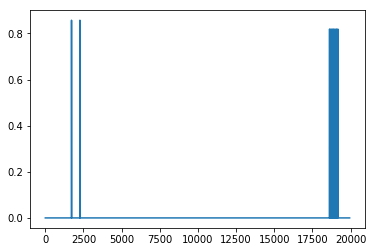

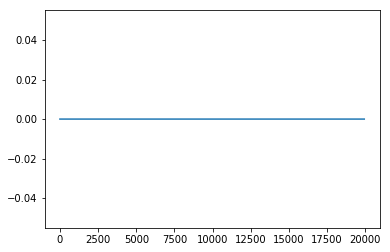

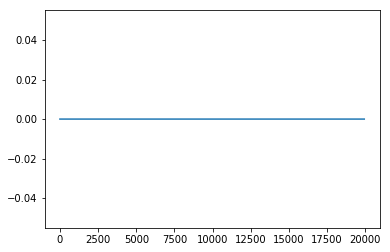

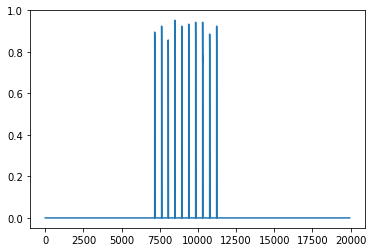

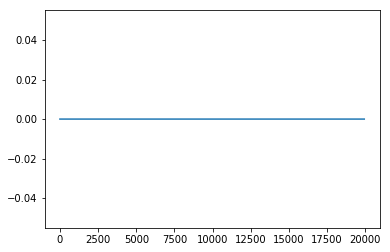

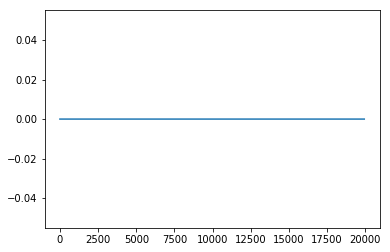

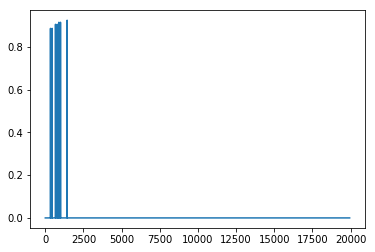

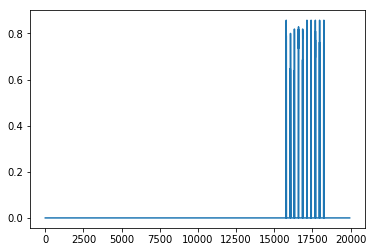

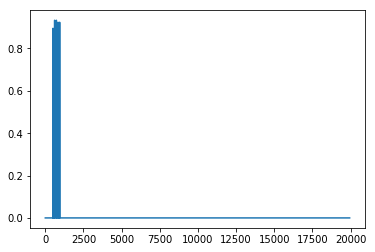

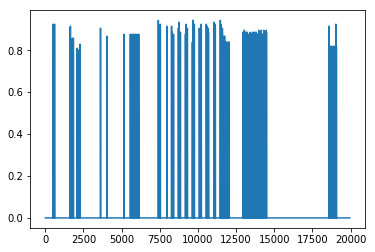

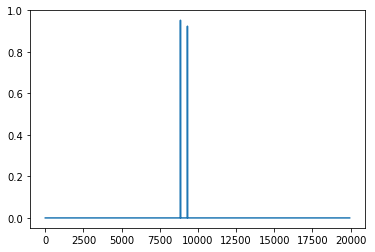

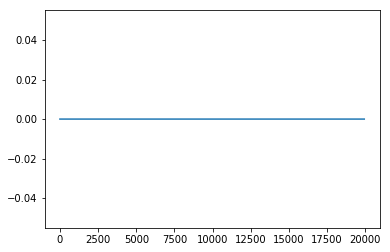

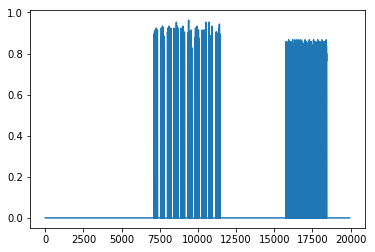

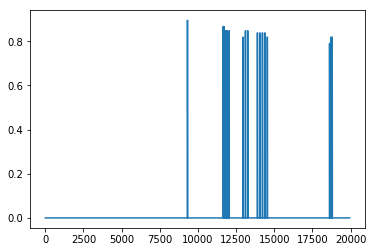

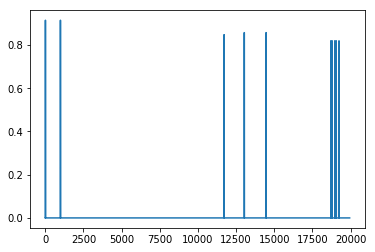

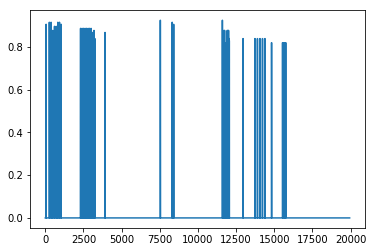

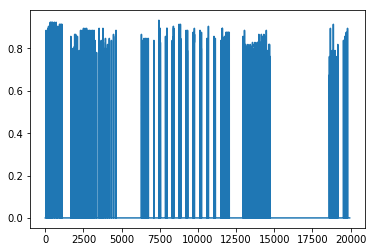

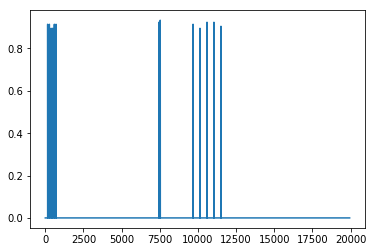

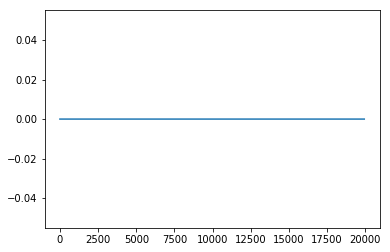

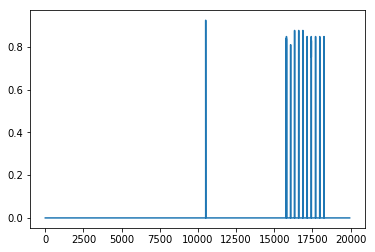

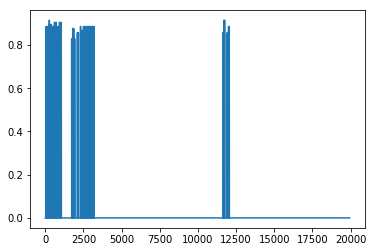

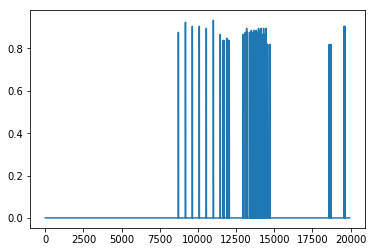

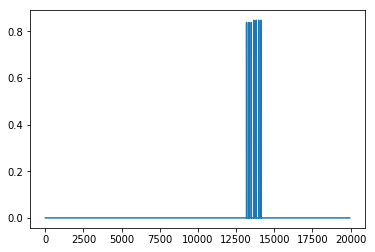

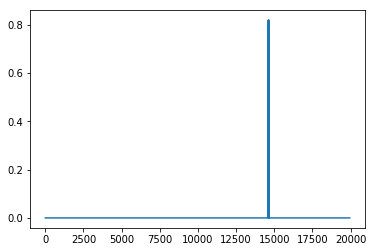

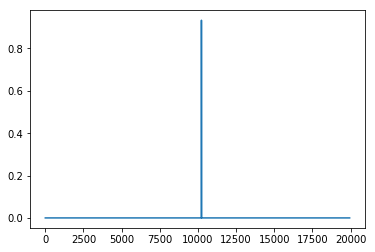

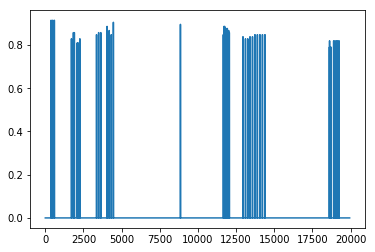

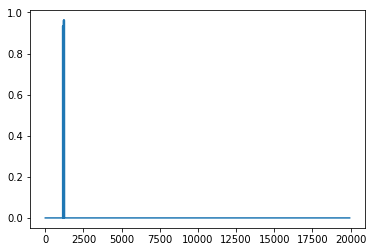

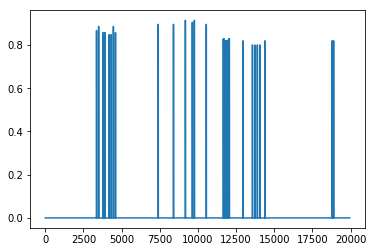

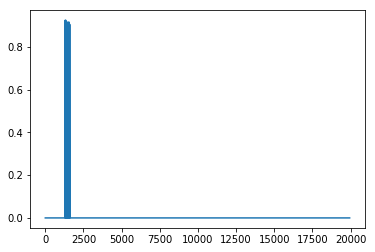

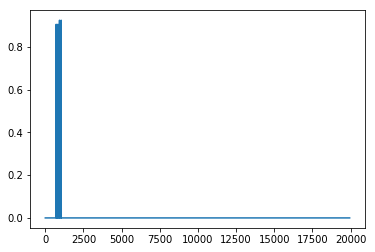

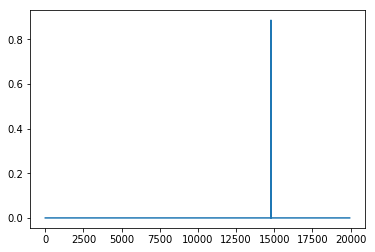

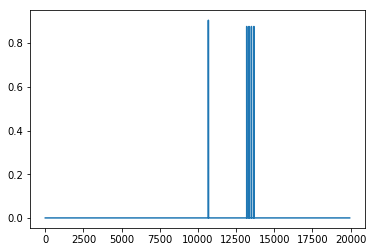

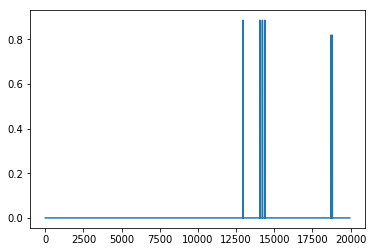

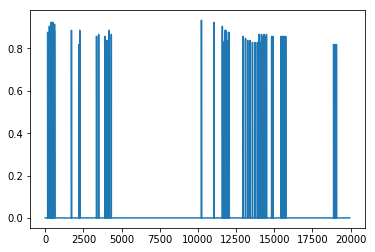

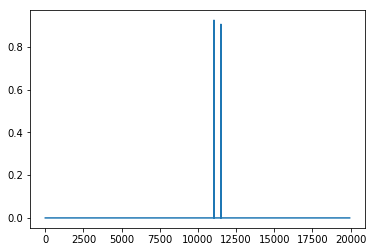

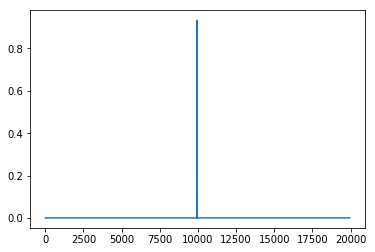

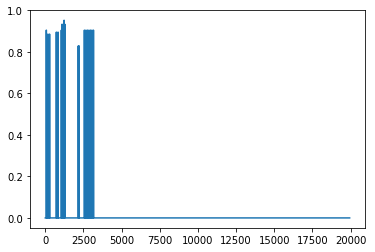

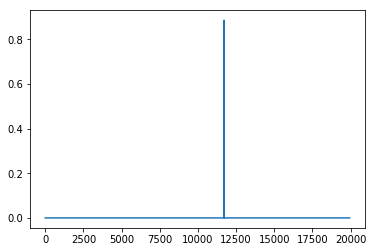

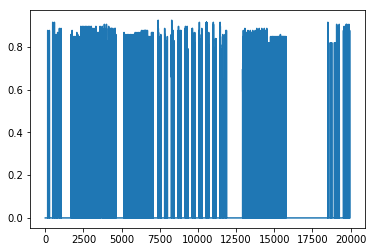

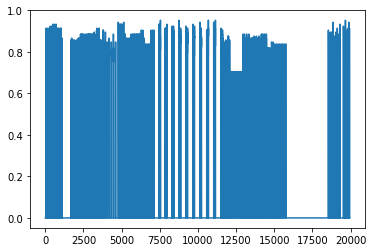

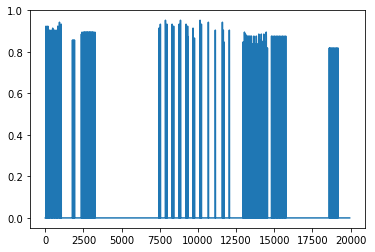

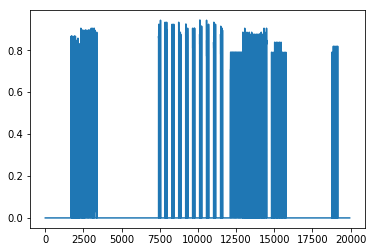

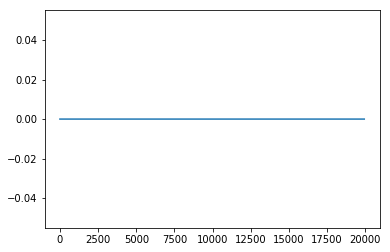

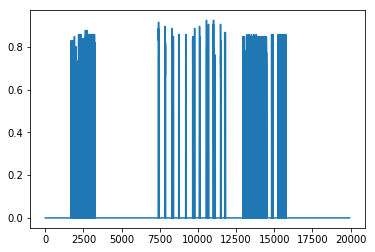

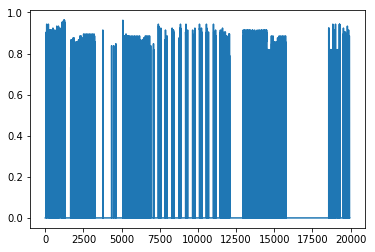

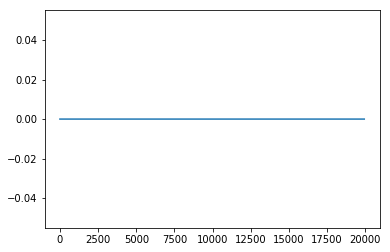

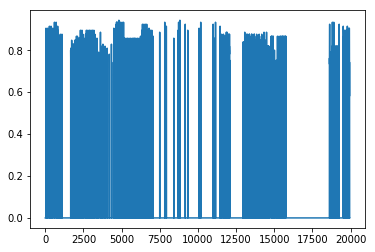

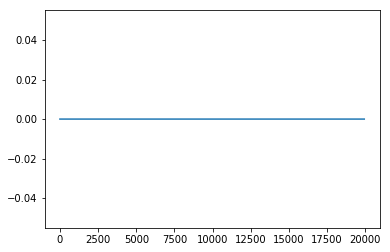

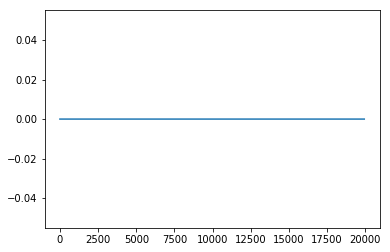

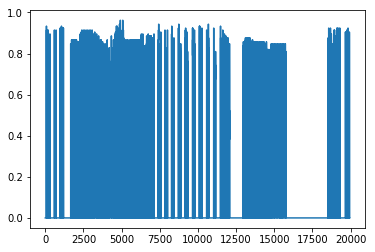

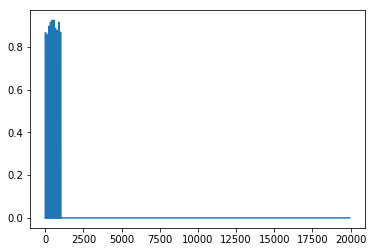

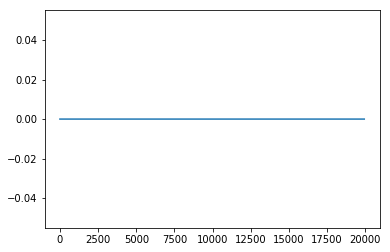

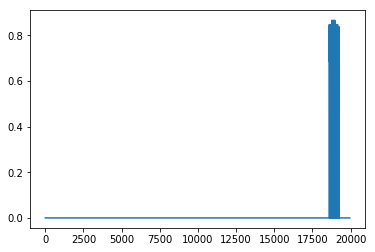

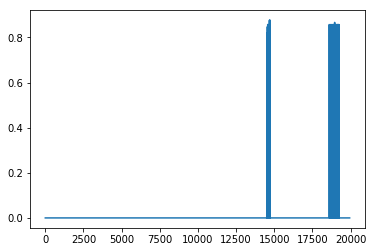

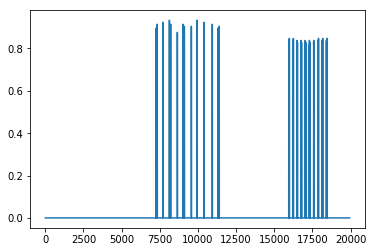

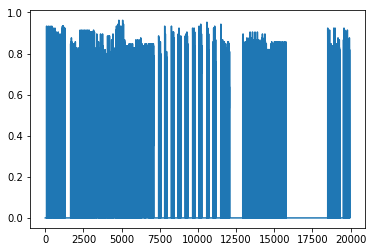

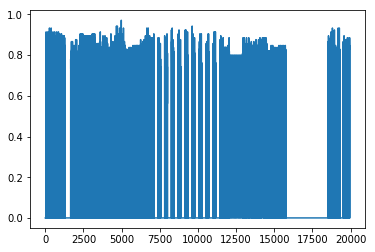

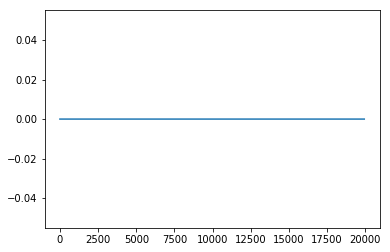

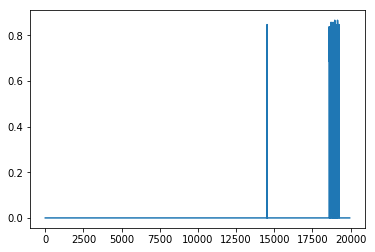

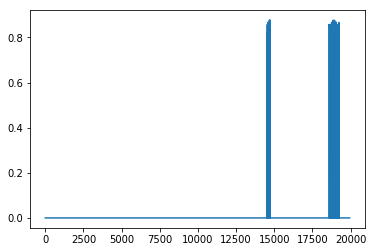

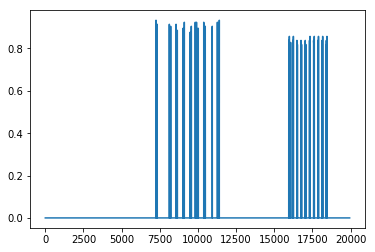

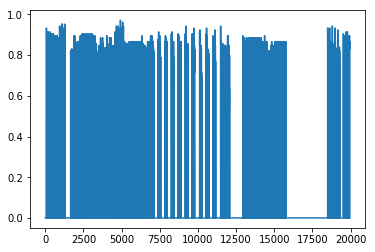

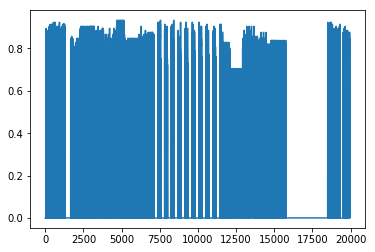

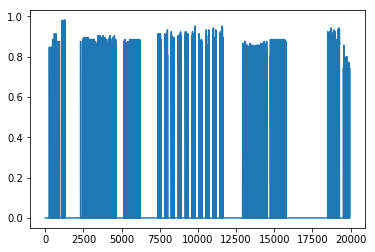

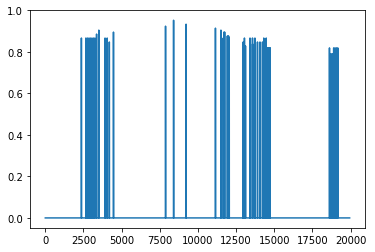

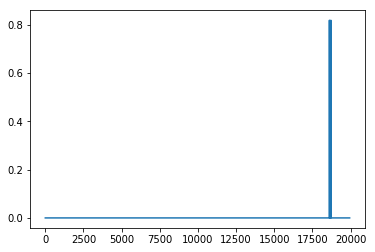

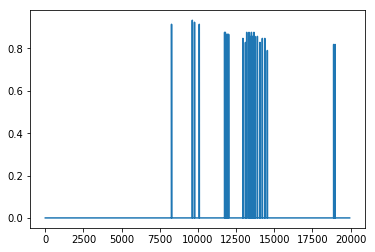

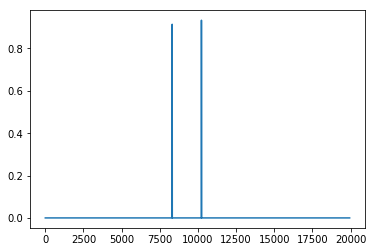

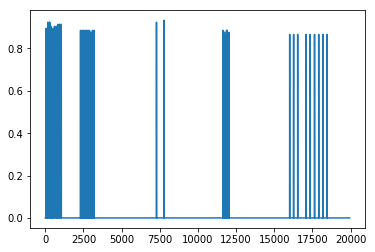

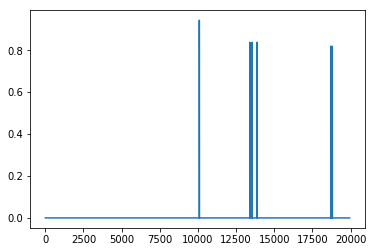

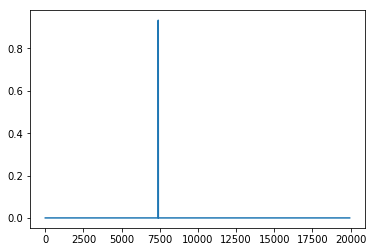

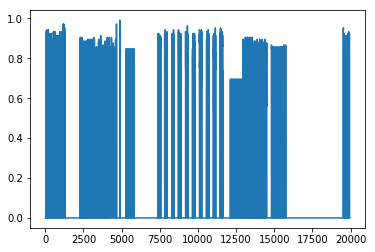

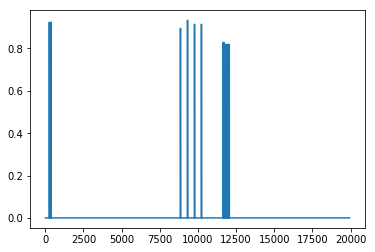

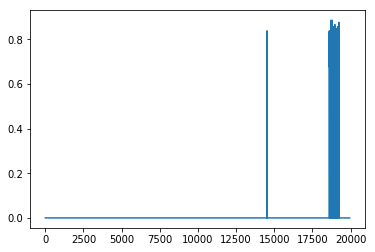

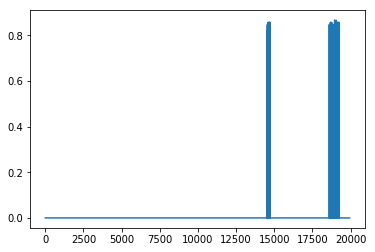

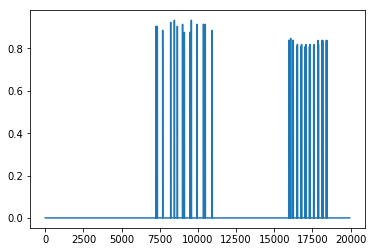

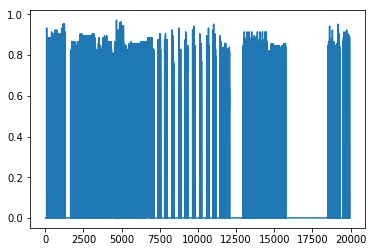

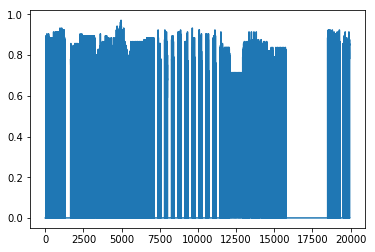

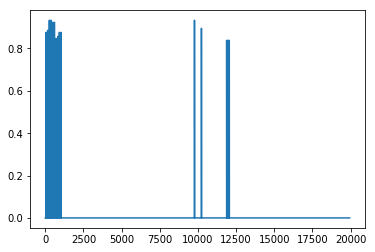

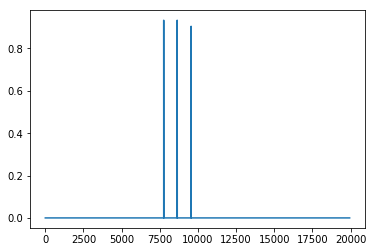

In [55]:
for i in range(1, 519):
    plt.plot(nor_train.iloc[:, i])
    plt.show()

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


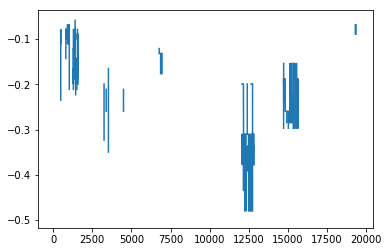

In [61]:
plt.plot(np.log(nor_train.iloc[:, 255]))
plt.show()


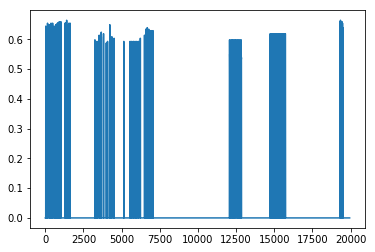

In [68]:
plt.plot(np.log(nor_train.iloc[:, 255]+1))
plt.show()

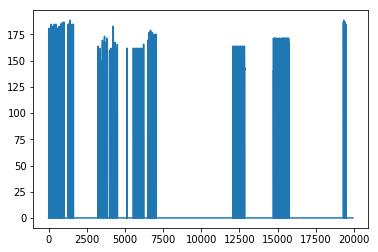

In [73]:
plt.plot(nor_train.iloc[:, 255]*200)
plt.show()

### 변수정규화
각각의 와이파이 신호는 -104부터 0의 값을 가지며 100인경우에는 신호가 잡히지 않음을 의미한다. 
최소잔자제곱법을 효과적으로 사용하기위해서 값을 정규화시킬 필요가 있다. 신호가 잡히지않으면 0, 신호가 강할 수록 1에 가깝게 정규화 시켰다. 

In [74]:
# normalization_1
nor_train = (raw_train.iloc[:, 0:520]-1)/(-105)
nor_train[nor_train == -0.9428571428571428] = 0
nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = (raw_validation.iloc[:, 0:520]-1)/(-105)
nor_validation[nor_validation == -0.9428571428571428] = 0
nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

In [2]:
# normalization_2
nor_train = raw_train.iloc[:, 0:520]/(-104)
nor_train[nor_train == -0.9615384615384616] = 0
nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = raw_validation.iloc[:, 0:520]/(-104)
nor_validation[nor_validation == -0.9615384615384616] = 0
nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

In [66]:
# remove null columes
check_bool_train = np.sum(nor_train.iloc[:, :520])!=0.0
#nor_train_null = nor_train.iloc[:, check_bool.values]

check_bool_validation = np.sum(nor_validation.iloc[:, :520]!=0.0)
#nor_validation_null = nor_validation.iloc[:, check_bool.values]
check = (check_bool_train | check_bool_validation == True)
check.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

---

In [124]:
# set display option
pd.set_option('display.float_format', lambda x: '%.3f' % x)

---

### One-Hot-Encoding
층 수, 빌딩 번호는 명목변수이기 때문에 정수 표현을 위해서는 One-Hot-Encoding이 필요하다.

In [75]:
# one-hot-encoding train & test data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype=int)

train_c = raw_train.loc[:, ("FLOOR", "BUILDINGID")].values
train_c_e = ohe.fit(train_c)
train_c = train_c_e.transform(train_c).toarray()
train_c = pd.DataFrame(train_c)

validation_c = raw_validation.loc[:, ("FLOOR", "BUILDINGID")].values
validation_c = train_c_e.transform(validation_c).toarray()
validation_c = pd.DataFrame(validation_c)

---

In [82]:
model_KN = KNeighborsRegressor(n_neighbors=3).fit(train_x, train_y)
predic_y = model_KN.predict(validation_x)

predic_y, raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]

(array([[   -7406.82172562,  4864882.45618794],
        [   -7385.5264    ,  4864838.959     ],
        [   -7370.0107    ,  4864847.7535    ],
        ..., 
        [   -7639.4784    ,  4864914.44456666],
        [   -7641.4491    ,  4864919.60056667],
        [   -7639.6588    ,  4864913.35503333]]),
         LONGITUDE      LATITUDE
 0    -7515.916799  4.864890e+06
 1    -7383.867221  4.864840e+06
 2    -7374.302080  4.864847e+06
 3    -7365.824883  4.864843e+06
 4    -7641.499303  4.864922e+06
 5    -7338.807210  4.864825e+06
 6    -7379.351683  4.864849e+06
 7    -7340.558777  4.864759e+06
 8    -7357.531253  4.864766e+06
 9    -7345.085170  4.864831e+06
 10   -7344.182657  4.864754e+06
 11   -7372.664041  4.864844e+06
 12   -7377.067905  4.864849e+06
 13   -7331.100100  4.864767e+06
 14   -7385.871536  4.864840e+06
 15   -7393.435150  4.864837e+06
 16   -7559.678074  4.864887e+06
 17   -7414.450283  4.864788e+06
 18   -7402.404284  4.864806e+06
 19   -7358.379579  4.864837e+06
 20

LONGITUDE      LATITUDE
0     -7541.264300  4.864921e+06
1     -7536.621200  4.864934e+06
2     -7519.152400  4.864950e+06
3     -7524.570400  4.864934e+06
4     -7632.143600  4.864982e+06
5     -7533.896200  4.864939e+06
6     -7519.152400  4.864950e+06
7     -7527.451100  4.864929e+06
8     -7559.497300  4.864888e+06
9     -7510.437173  4.864949e+06
10    -7528.816402  4.864959e+06
11    -7523.628200  4.864952e+06
12    -7571.093400  4.864872e+06
13    -7559.782000  4.864871e+06
14    -7562.186200  4.864867e+06
15    -7564.196300  4.864887e+06
16    -7555.132300  4.864885e+06
17    -7520.724500  4.864892e+06
18    -7521.867186  4.864889e+06
19    -7537.339900  4.864896e+06
20    -7526.710927  4.864893e+06
21    -7516.088800  4.864890e+06
22    -7512.604164  4.864885e+06
23    -7520.755800  4.864891e+06
24    -7516.841500  4.864889e+06
25    -7502.449700  4.864884e+06
26    -7489.177500  4.864900e+06
27    -7482.456176  4.864901e+06
28    -7491.030634  4.864865e+06
29    -7501.221900  4.864863e+06
...            ...           ...
19907 -7541.263500  4.864921e+06
19908 -7539.413493  4.864924e+06
19909 -7526.320097  4.864920e+06
19910 -7404.436200  4.864809e+06
19911 -7404.835700  4.864808e+06
19912 -7408.338870  4.864812e+06
19913 -7405.654400  4.864802e+06
19914 -7408.565700  4.864797e+06
19915 -7366.449900  4.864770e+06
19916 -7398.534500  4.864788e+06
19917 -7375.148100  4.864774e+06
19918 -7384.873200  4.864781e+06
19919 -7395.213200  4.864786e+06
19920 -7352.940800  4.864763e+06
19921 -7336.944300  4.864764e+06
19922 -7340.191400  4.864758e+06
19923 -7349.475600  4.864761e+06
19924 -7363.159000  4.864768e+06
19925 -7327.479452  4.864767e+06
19926 -7331.496600  4.864768e+06
19927 -7390.734700  4.864835e+06
19928 -7331.463800  4.864769e+06
19929 -7496.900900  4.864897e+06
19930 -7516.198400  4.864890e+06
19931 -7394.577825  4.864837e+06
19932 -7485.468600  4.864875e+06
19933 -7390.620600  4.864836e+06
19934 -7516.841500  4.864889e+06
19935 -7537.321900  4.864896e+06
19936 -7536.165800  4.864898e+06

[19937 rows x 2 columns]

In [83]:
predic_y[:, 0]-raw_validation.loc[:, "LONGITUDE"]

0       109.095074
1        -1.659179
2         4.291380
3        -6.978017
4        -6.388864
5        17.183610
6        11.020083
7        -7.491556
8        16.646103
9        14.421637
10        2.303340
11        4.773975
12        3.639738
13      -28.536150
14        7.033552
15       51.534750
16       23.512274
17        9.744783
18       -3.738872
19        7.340040
20       -0.980319
21       41.032816
22        5.946173
23      -10.479130
24        3.927423
25        5.400752
26       18.425161
27       14.424507
28        4.893316
29        0.815093
           ...    
1081    -18.678670
1082    -12.475146
1083    -16.821419
1084    -15.142038
1085    -11.320270
1086    -17.182554
1087    -10.491935
1088     -9.143513
1089     -8.352653
1090     -0.969700
1091    -57.577025
1092     17.495063
1093    -43.640853
1094     20.326033
1095      5.118495
1096      3.837472
1097     11.984293
1098      5.478169
1099      8.509420
1100      5.185249
1101      2.132816
1102     -2.

In [84]:
gap = predic_y-raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]
np.mean(gap), np.var(gap)

(LONGITUDE    1.852776
 LATITUDE     2.471611
 dtype: float64, LONGITUDE    220.470450
 LATITUDE     166.765803
 dtype: float64)

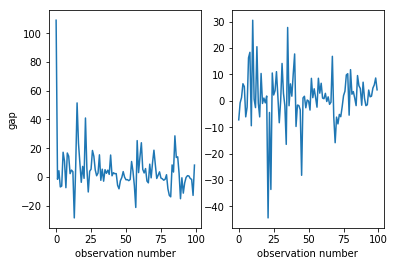

In [86]:
plt.subplot(1, 2, 1)
plt.plot(gap.iloc[:,0][:100])
plt.xlabel("observation number")
plt.ylabel("gap")
plt.subplot(1, 2, 2)
plt.plot(gap.iloc[:,1][:100])
plt.xlabel("observation number")
plt.show()

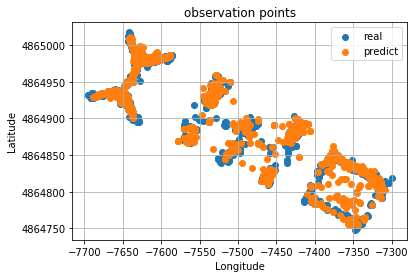

In [131]:
plt.scatter(raw_validation["LONGITUDE"], raw_validation["LATITUDE"], label = "real")
plt.scatter(pd.DataFrame(predic_y)[0], pd.DataFrame(predic_y)[1], label = "predict")
plt.legend()
plt.grid()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

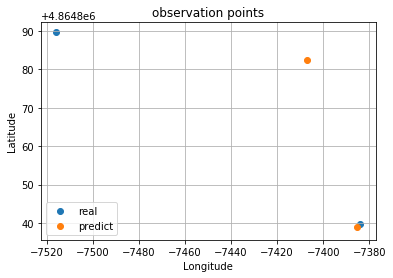

In [130]:
plt.scatter(raw_validation["LONGITUDE"][:2], raw_validation["LATITUDE"][:2], label = "real")
plt.scatter(pd.DataFrame(predic_y)[0][:2], pd.DataFrame(predic_y)[1][:2], label = "predict")
plt.legend()
plt.grid()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

In [95]:
raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]

LONGITUDE      LATITUDE
0    -7515.916799  4.864890e+06
1    -7383.867221  4.864840e+06
2    -7374.302080  4.864847e+06
3    -7365.824883  4.864843e+06
4    -7641.499303  4.864922e+06
5    -7338.807210  4.864825e+06
6    -7379.351683  4.864849e+06
7    -7340.558777  4.864759e+06
8    -7357.531253  4.864766e+06
9    -7345.085170  4.864831e+06
10   -7344.182657  4.864754e+06
11   -7372.664041  4.864844e+06
12   -7377.067905  4.864849e+06
13   -7331.100100  4.864767e+06
14   -7385.871536  4.864840e+06
15   -7393.435150  4.864837e+06
16   -7559.678074  4.864887e+06
17   -7414.450283  4.864788e+06
18   -7402.404284  4.864806e+06
19   -7358.379579  4.864837e+06
20   -7558.859014  4.864871e+06
21   -7586.944816  4.864986e+06
22   -7410.584706  4.864793e+06
23   -7394.226370  4.864821e+06
24   -7568.985890  4.864876e+06
25   -7562.717100  4.864866e+06
26   -7385.478494  4.864838e+06
27   -7397.033907  4.864829e+06
28   -7674.785283  4.864934e+06
29   -7656.475561  4.864938e+06
...           ...           ...
1081 -7324.144263  4.864818e+06
1082 -7316.901654  4.864815e+06
1083 -7346.611346  4.864756e+06
1084 -7337.790119  4.864763e+06
1085 -7345.639826  4.864756e+06
1086 -7345.671723  4.864750e+06
1087 -7345.872247  4.864750e+06
1088 -7347.220669  4.864748e+06
1089 -7348.607444  4.864757e+06
1090 -7355.990396  4.864762e+06
1091 -7362.995454  4.864765e+06
1092 -7370.427220  4.864768e+06
1093 -7376.931626  4.864773e+06
1094 -7405.102400  4.864787e+06
1095 -7406.178666  4.864788e+06
1096 -7404.897642  4.864790e+06
1097 -7411.093993  4.864793e+06
1098 -7407.627303  4.864799e+06
1099 -7390.054495  4.864836e+06
1100 -7381.842483  4.864844e+06
1101 -7376.419616  4.864853e+06
1102 -7358.485367  4.864840e+06
1103 -7359.502802  4.864837e+06
1104 -7330.881524  4.864823e+06
1105 -7316.945210  4.864815e+06
1106 -7317.344231  4.864796e+06
1107 -7313.731120  4.864792e+06
1108 -7637.535798  4.864903e+06
1109 -7636.654005  4.864905e+06
1110 -7637.944120  4.864904e+06

[1111 rows x 2 columns]

In [101]:
Point2D(predic_y, raw_validation.loc[:, ("LONGITUDE", "LATITUDE")])

In [106]:
raw_gap = raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]

In [107]:
pre_gap = pd.DataFrame(predic_y, columns=["LONGITUDE", "LATITUDE"])

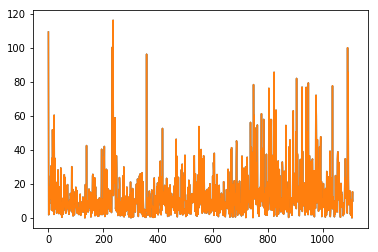

In [127]:
plt.plot(np.sqrt(np.sum((raw_gap-pre_gap)*(raw_gap-pre_gap), axis=1)))
plt.show()

### 데이터분할
WIFI신호세기를 통해 좌표를 추정하기 위해 train_x에는 WIFI신호를, train_y에는 좌표값을 입력하였다. 

In [78]:
# train_1
##train_y = nor_train["LONGITUDE"]
train_y = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
train_x = nor_train.iloc[:, 0:520]
train_x = train_x.join(train_c)
##train_x = sm.add_constant(train_x)

model_1 = sm.OLS(train_y, train_x).fit()


### OLS모델

In [15]:
model_1 = sm.OLS(train_y, train_x).fit()

### 예측
위에서 만든 OLS모델에 validation값을 넣어 좌표를 예측했다.

In [81]:
# test_1
validation_x = nor_validation.iloc[:, 0:520]
validation_x = validation_x.join(validation_c)
##validation_x = sm.add_constant(validation_x)

validation_y = model_1.predict(validation_x)
pd.DataFrame(validation_y, columns=["LONGITUDE", "LATITUDE"]).head()

In [9]:
raw_validation.loc[:, ("LONGITUDE", "LATITUDE")].head()

LONGITUDE    LATITUDE
0  -7515.917 4864889.663
1  -7383.867 4864839.740
2  -7374.302 4864846.534
3  -7365.825 4864842.829
4  -7641.499 4864922.399

---

### 예측값과 실제값의 차이

In [41]:
# GAP
validation_y = validation_y.rename(columns={0:"LONGITUDE_pre", 1:"LATITUDE_pre"})

result = validation_y.join(raw_validation.loc[:, ("LONGITUDE", "LATITUDE")])
result["LONG_Gap"] = raw_validation.loc[:, "LONGITUDE"] - validation_y.loc[:, "LONGITUDE_pre"]
result["LAT_Gap"] = raw_validation.loc[:, "LATITUDE"] - validation_y.loc[:, "LATITUDE_pre"]
result.head()

LONGITUDE_pre  LATITUDE_pre  LONGITUDE    LATITUDE  LONG_Gap  LAT_Gap
0      -7477.431   4864883.582  -7515.917 4864889.663   -38.486    6.081
1      -7363.466   4864843.200  -7383.867 4864839.740   -20.401   -3.460
2      -7367.806   4864840.213  -7374.302 4864846.534    -6.496    6.320
3      -7354.912   4864841.143  -7365.825 4864842.829   -10.913    1.686
4      -7635.898   4864923.465  -7641.499 4864922.399    -5.602   -1.066

In [ ]:
plt.plot(np.sqrt(np.sum(result.loc["LONG_Gap", "LAT_Gap"]*result.loc["LONG_Gap", "LAT_Gap"], axis=1)))
plt.show()

---

### 시각화

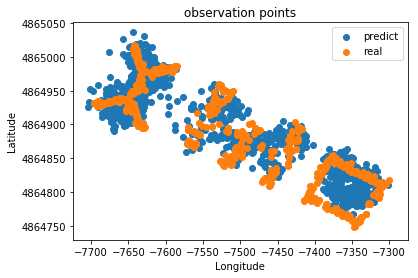

In [13]:
# Visualization_1
plt.scatter(validation_y["LONGITUDE_pre"], validation_y["LATITUDE_pre"], label = "predict")
plt.scatter(raw_validation["LONGITUDE"], raw_validation["LATITUDE"], label = "real")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

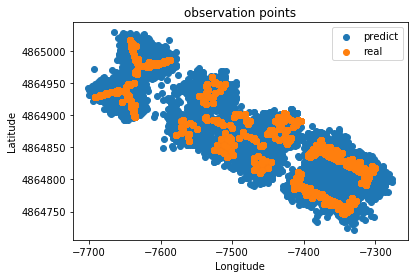

In [14]:
# Visualization_2
plt.scatter(model_1.fittedvalues.iloc[:, 0], model_1.fittedvalues.iloc[:, 1], label = "predict")
plt.scatter(raw_train["LONGITUDE"], raw_train["LATITUDE"], label = "real")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

---

### 분류
좌표값에 맞추어 해당 빌딩을 분류

In [15]:
# classification_1(BUILDINGID)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
class_x = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
class_y = nor_train.loc[:, ("BUILDINGID")]
model_c = QuadraticDiscriminantAnalysis().fit(class_x, class_y)

In [16]:
# predict_1(BUILDINGID)
pre_x = nor_validation.loc[:, ("LONGITUDE", "LATITUDE")]
predict_y = model_c.predict(pre_x)
predict_y

array([1, 2, 2, ..., 0, 0, 0], dtype=int64)

### 분류값과 실제값의 차이

In [17]:
# GAP
result = pd.DataFrame(predict_y, columns=["predict"])
result["real"] = nor_validation.loc[:, "BUILDINGID"]
result["LONGITUDE"] = nor_validation.loc[:, "LONGITUDE"]
result["LATITUDE"] = nor_validation.loc[:, "LATITUDE"]
len(result[result["predict"]==result["real"]])/len(result["predict"])

1.0

In [18]:
result.head()

predict  real  LONGITUDE    LATITUDE
0        1     1  -7515.917 4864889.663
1        2     2  -7383.867 4864839.740
2        2     2  -7374.302 4864846.534
3        2     2  -7365.825 4864842.829
4        0     0  -7641.499 4864922.399

### 분류결과보고서

In [19]:
# classify result reporting
from sklearn.metrics import *
print(classification_report(y_true=nor_validation.loc[:, "BUILDINGID"], y_pred=predict_y))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       536
          1       1.00      1.00      1.00       307
          2       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00      1111



---

### 시각화

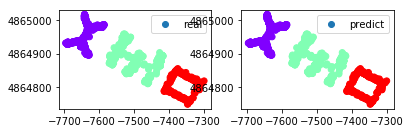

In [37]:
# Visualization
plt.subplot(221)
plt.scatter("LONGITUDE", "LATITUDE", data = result, c = "real", cmap="rainbow", label="real")
plt.legend()
plt.subplot(222)
plt.scatter("LONGITUDE", "LATITUDE", data = result, c = "predict", cmap="rainbow", label="predict")
plt.legend()
plt.show()